In [4]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pair_attrs = json.load(open("effect_pair_attr.json"))

In [5]:
pair_attrs_df = pd.DataFrame(pair_attrs)

In [6]:
pair_attrs_df.sample(10)

,attribute_1,attribute_2,P
13,Medu,reason,2.703821e-03
41,activities,goout,4.719584e-02
24,Mjob,famrel,1.141133e-02
11,address,Walc,3.013968e-02
35,failures,famrel,4.459180e-09
18,Fedu,failures,1.179057e-07
12,Pstatus,failures,1.853953e-02
26,Fjob,failures,5.576939e-03
29,reason,famrel,8.942104e-03
14,Medu,failures,1.411506e-17


In [7]:
por = pd.read_csv("student-por.csv", sep=";")

In [8]:
por.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
501,MS,M,16,U,LE3,T,4,3,other,other,...,4,2,5,1,5,5,8,14,12,13
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,2,12,13,12
158,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,2,11,11,11
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,0
383,GP,M,18,U,LE3,T,2,2,other,other,...,4,5,5,2,4,5,0,11,11,12
561,MS,M,18,U,LE3,T,1,1,at_home,at_home,...,4,3,3,1,4,5,6,10,9,10
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
199,GP,M,17,U,GT3,T,3,3,services,services,...,4,3,4,2,3,4,6,11,13,14
309,GP,M,18,U,GT3,T,4,2,health,other,...,5,4,5,1,3,5,4,10,12,14
301,GP,M,18,U,GT3,T,4,3,teacher,other,...,4,3,2,1,1,3,2,10,10,11


In [11]:
def nbox_plot(names, size):
  plt.figure(figsize=(16,12))
  for i,name in enumerate(names):
    plt.subplot(size[0], size[1], i+1)
    sns.boxplot(x=name, y='G3', data=por)
    plt.tight_layout()

/tmp/ipykernel_7988/2409968838.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,12))


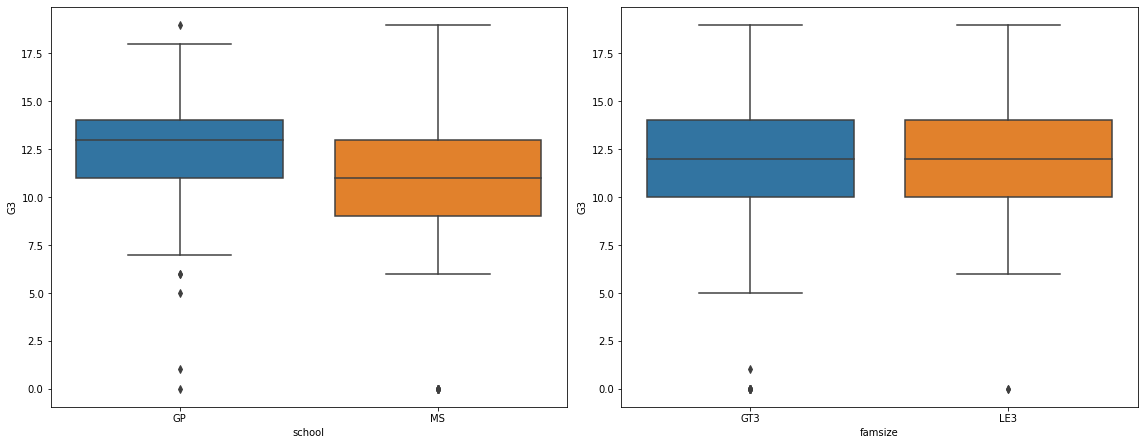

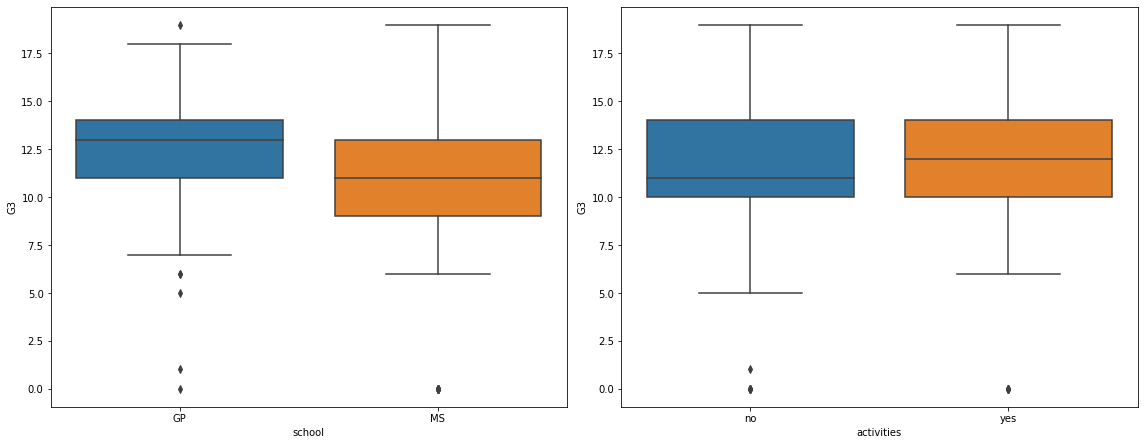

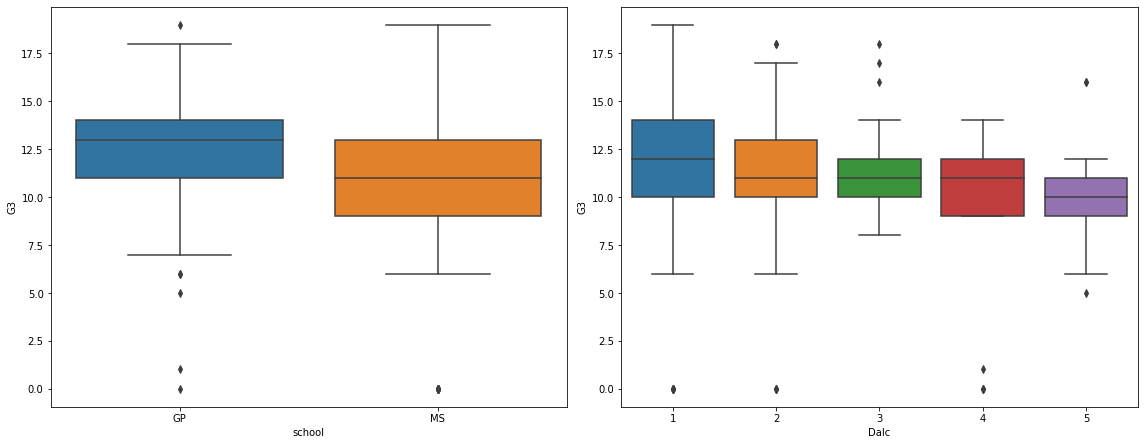

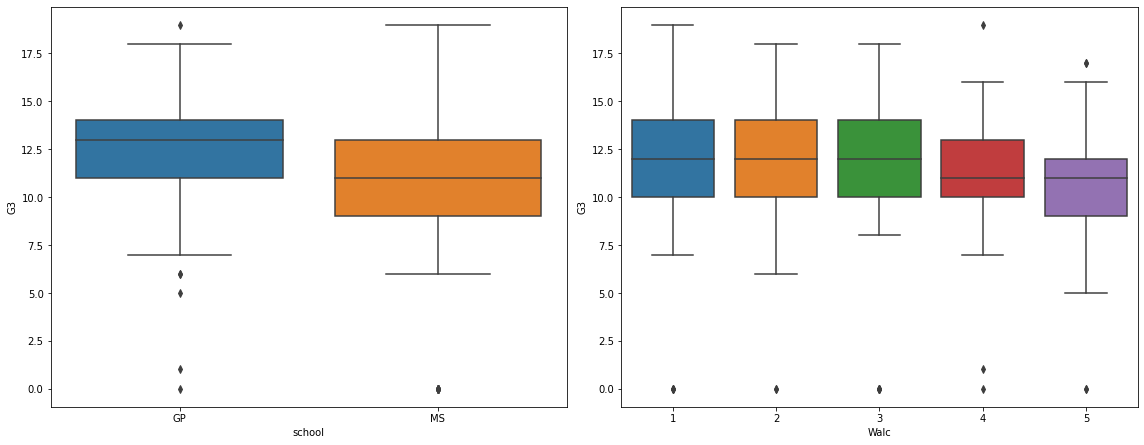

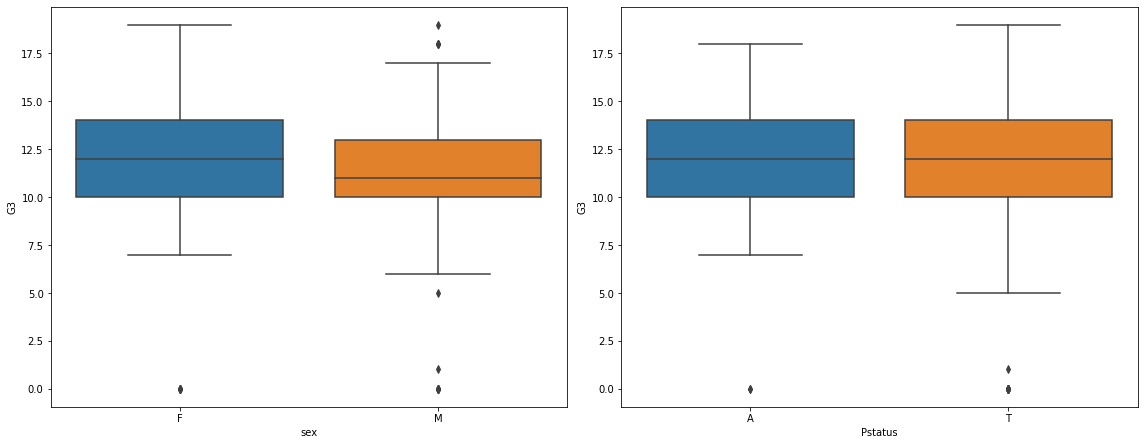

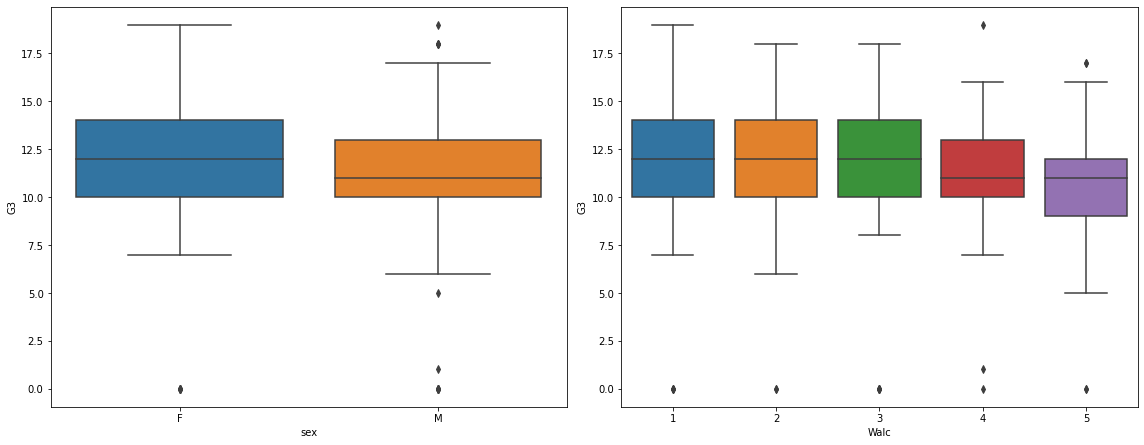

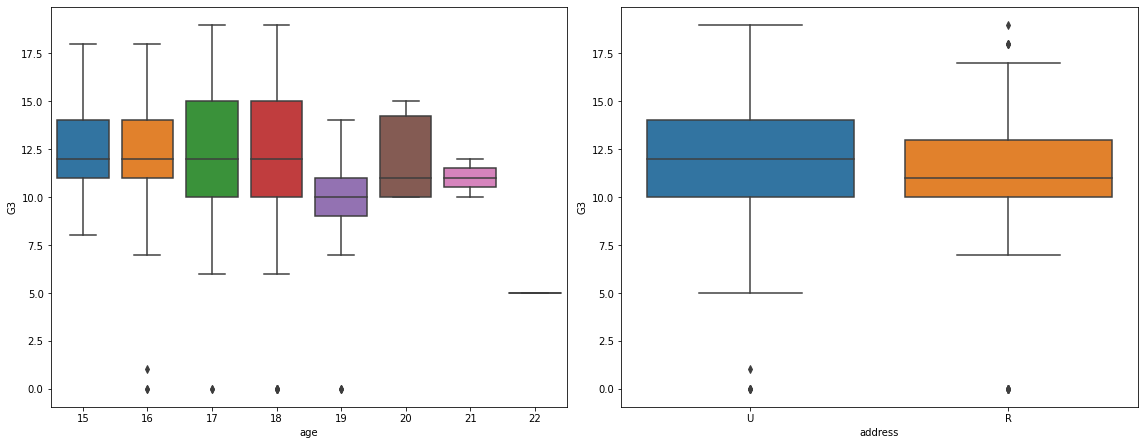

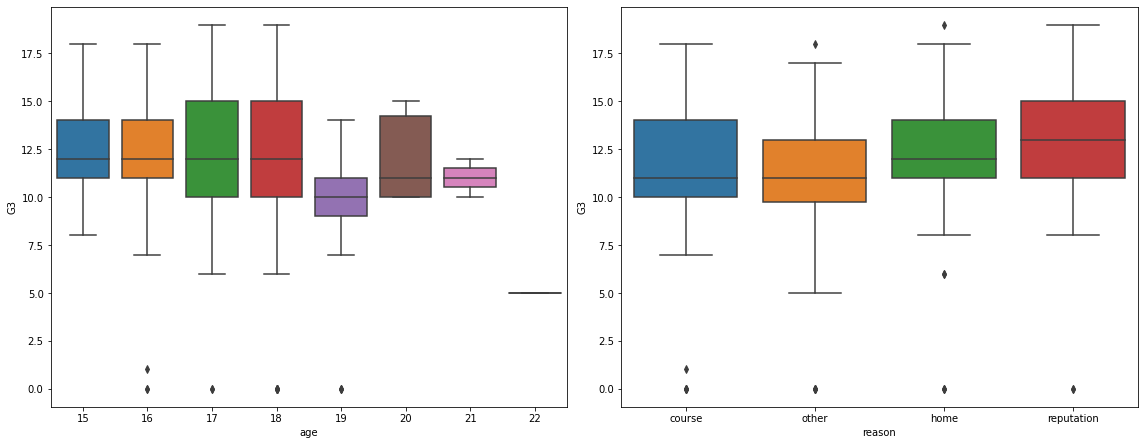

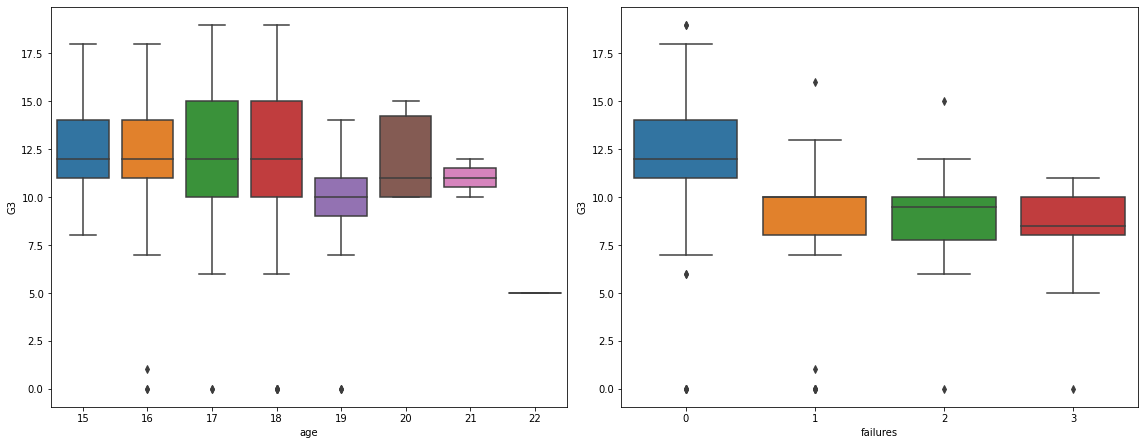

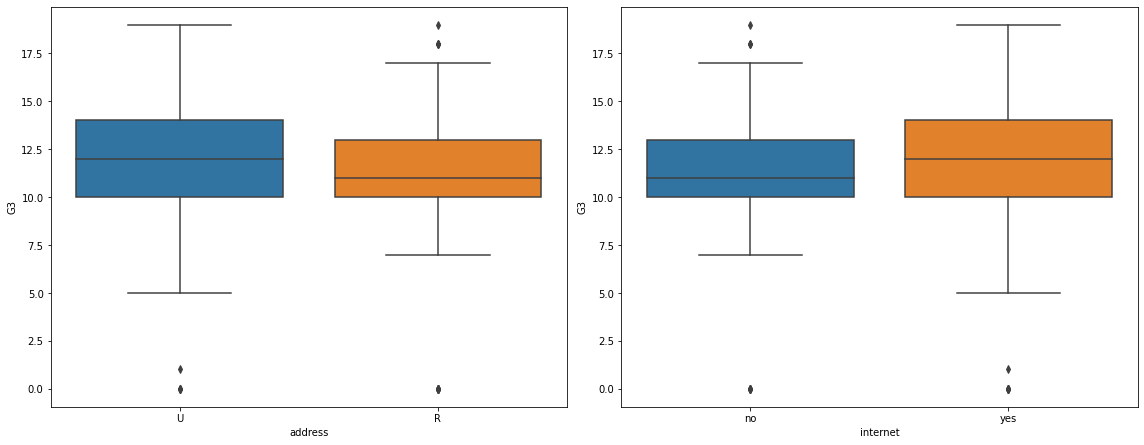

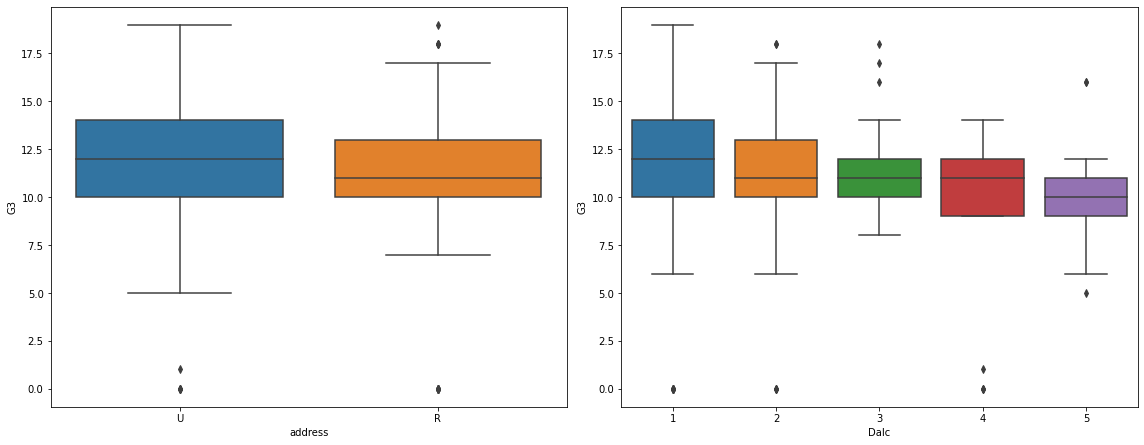

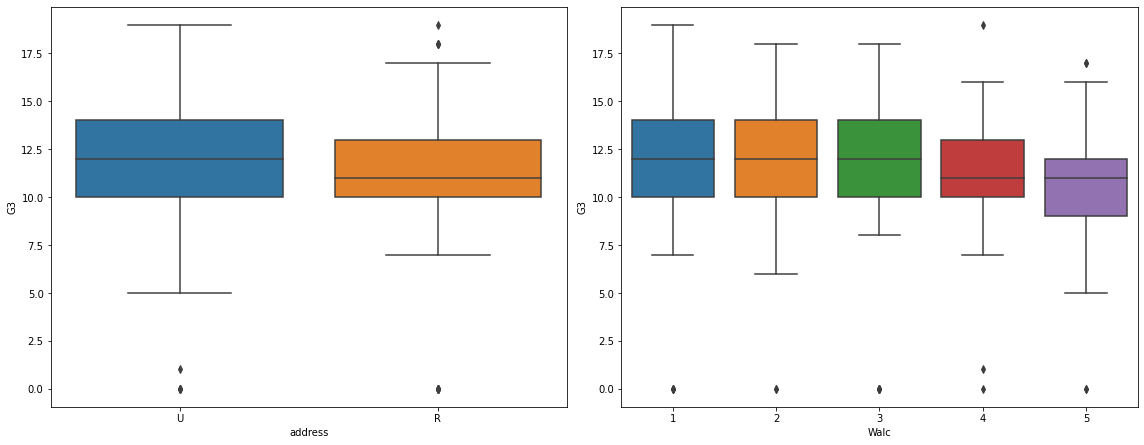

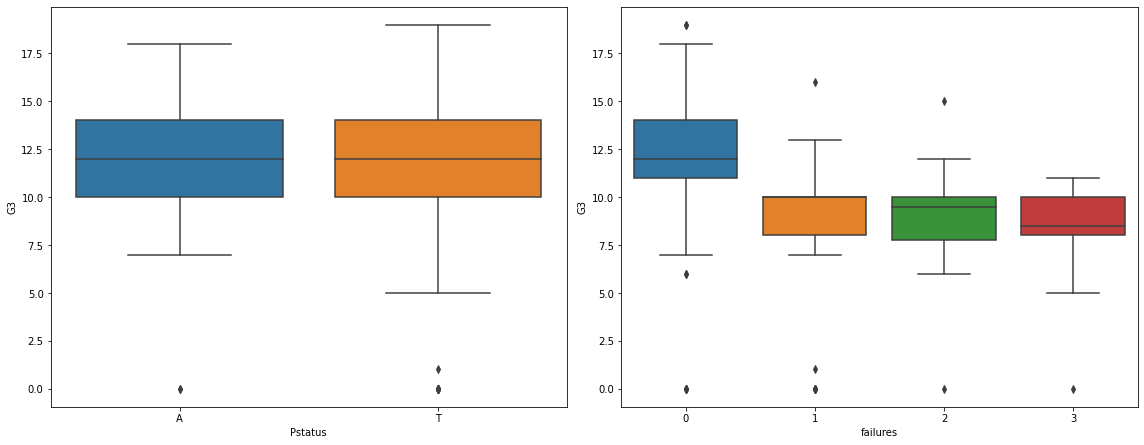

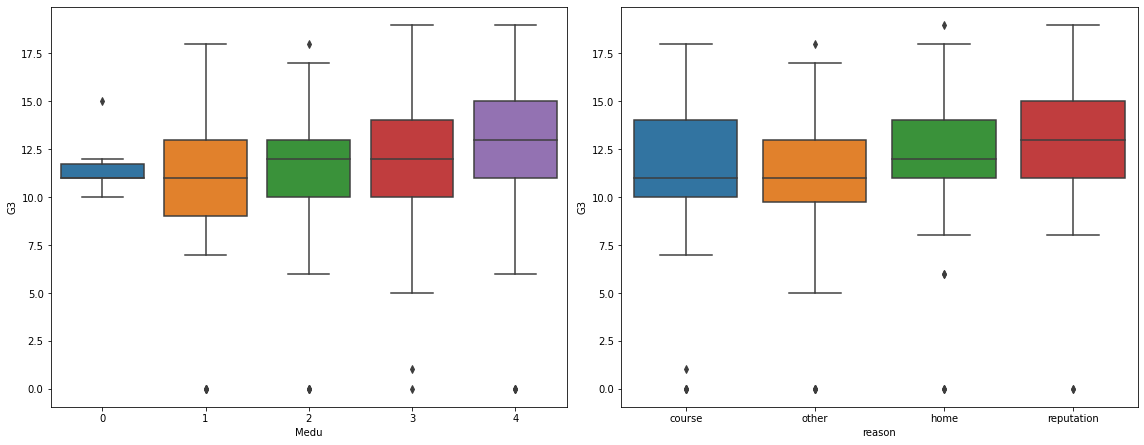

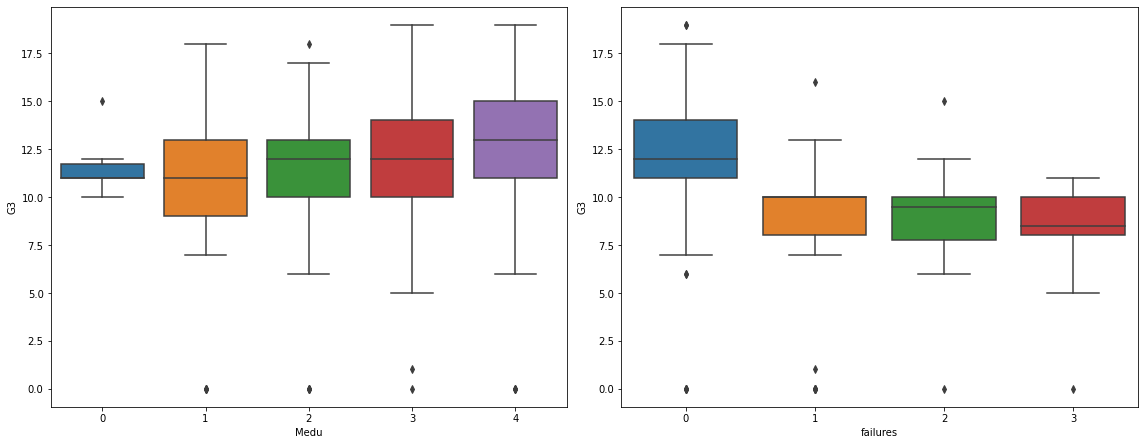

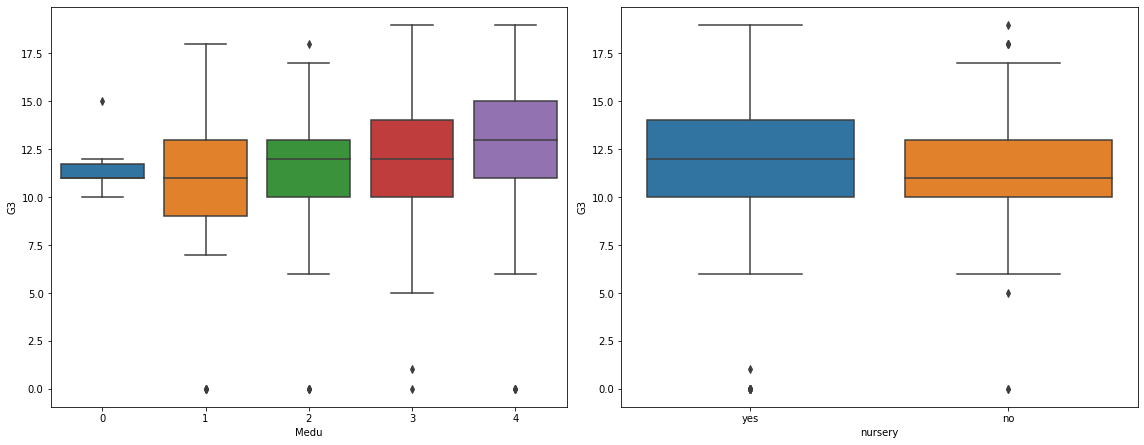

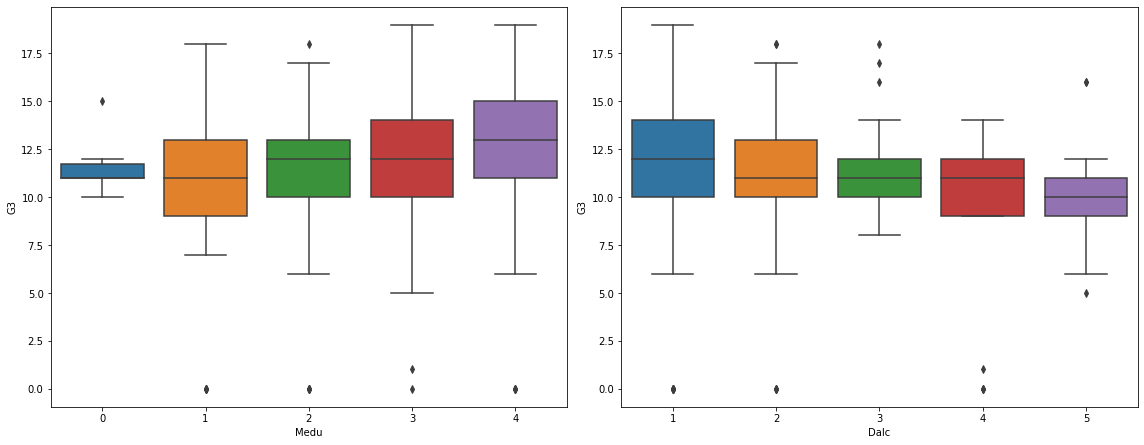

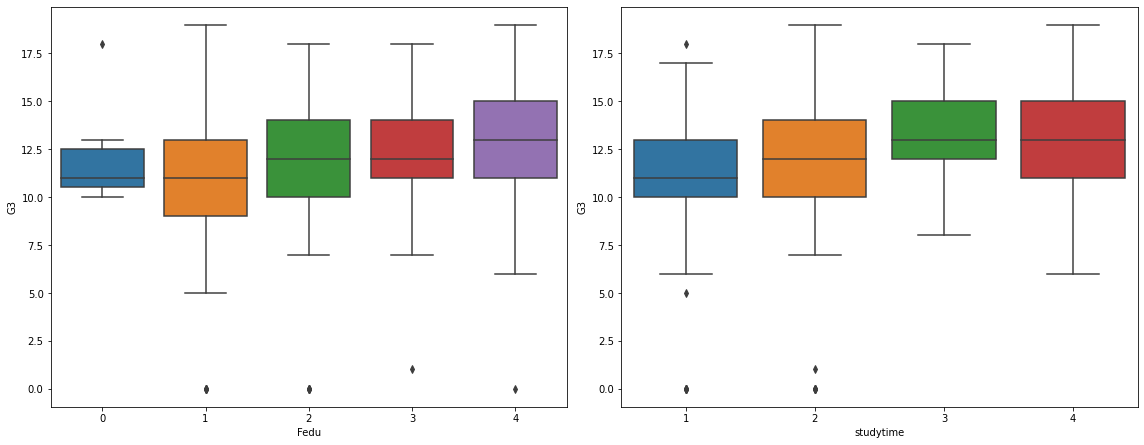

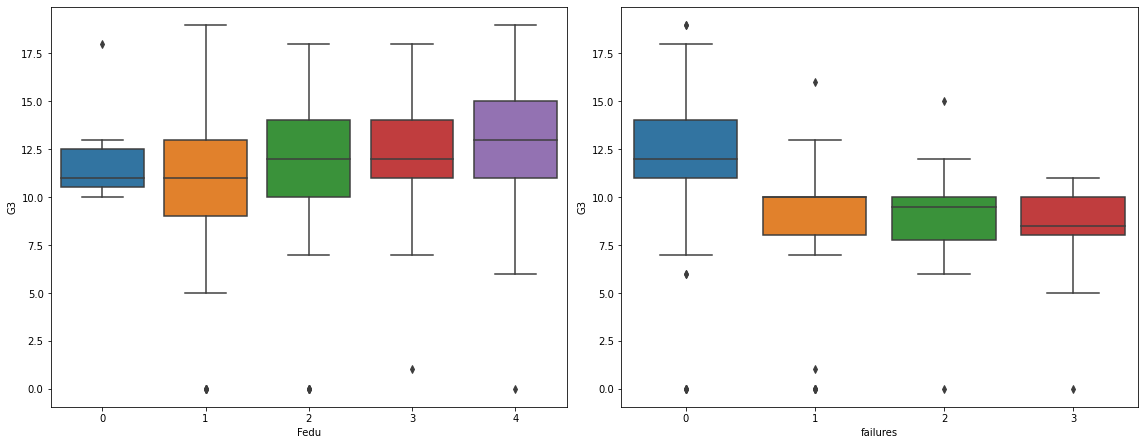

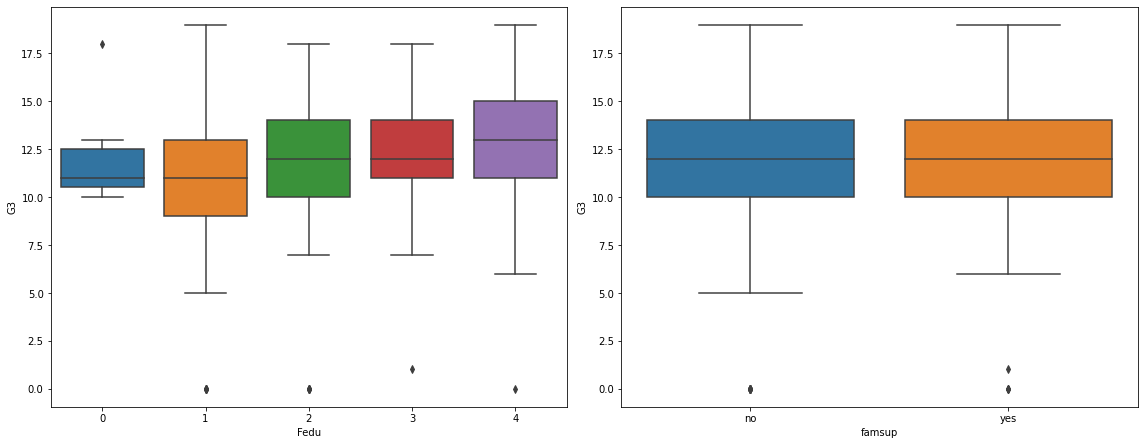

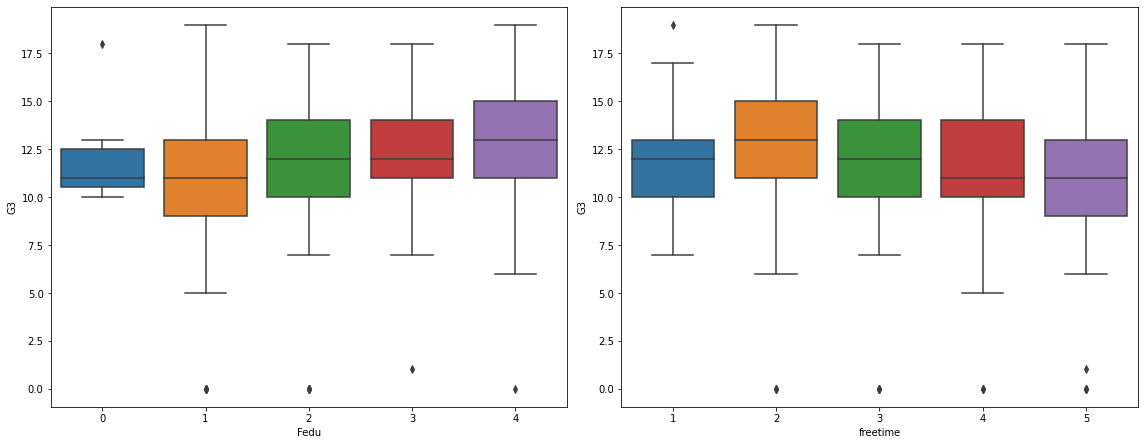

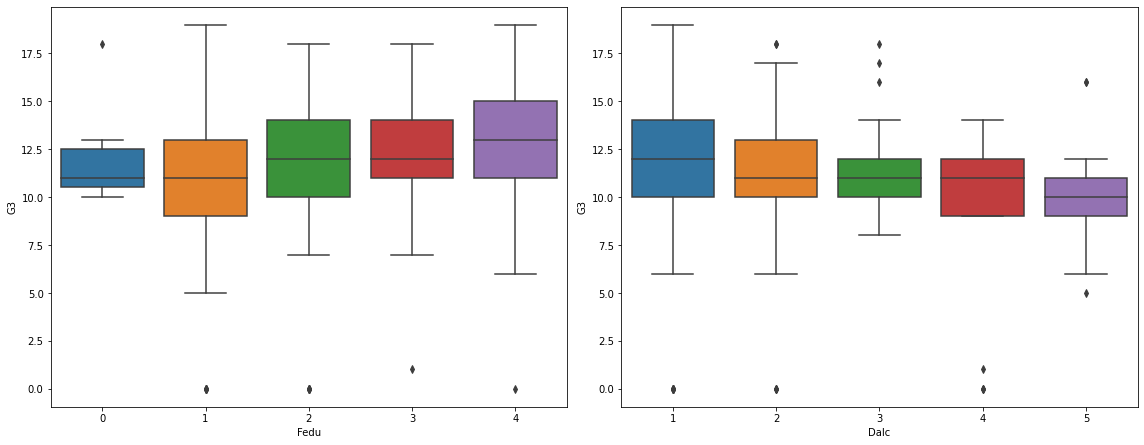

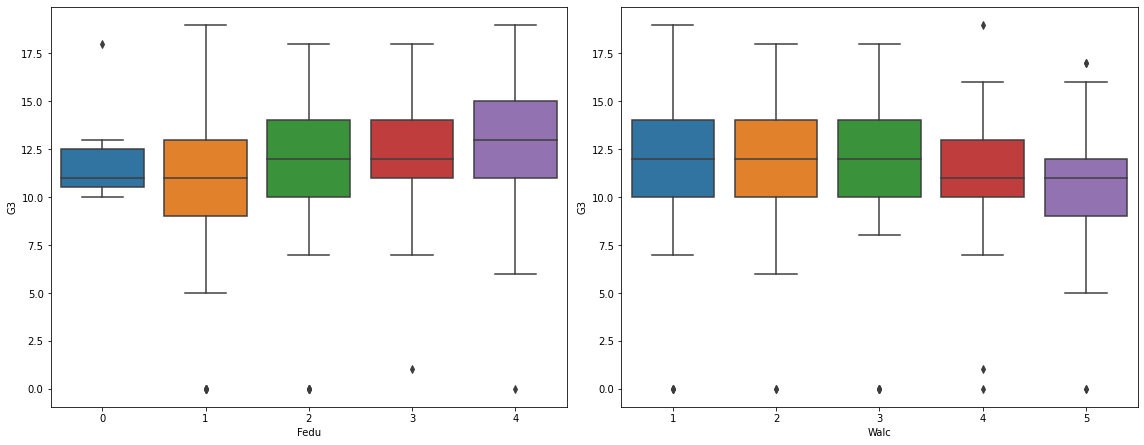

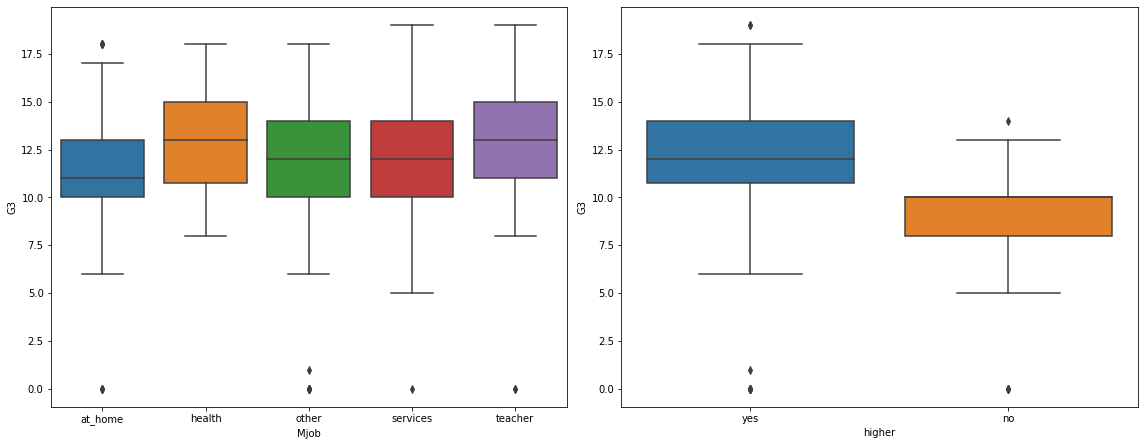

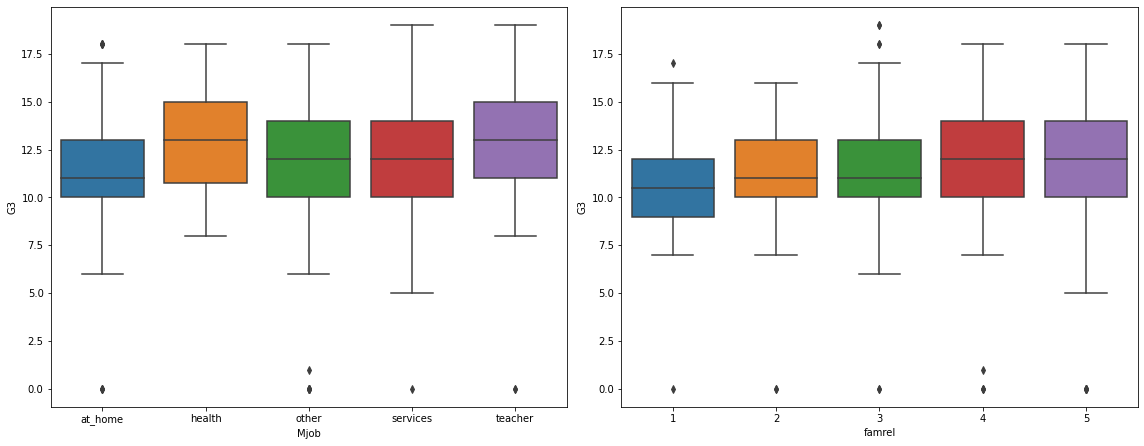

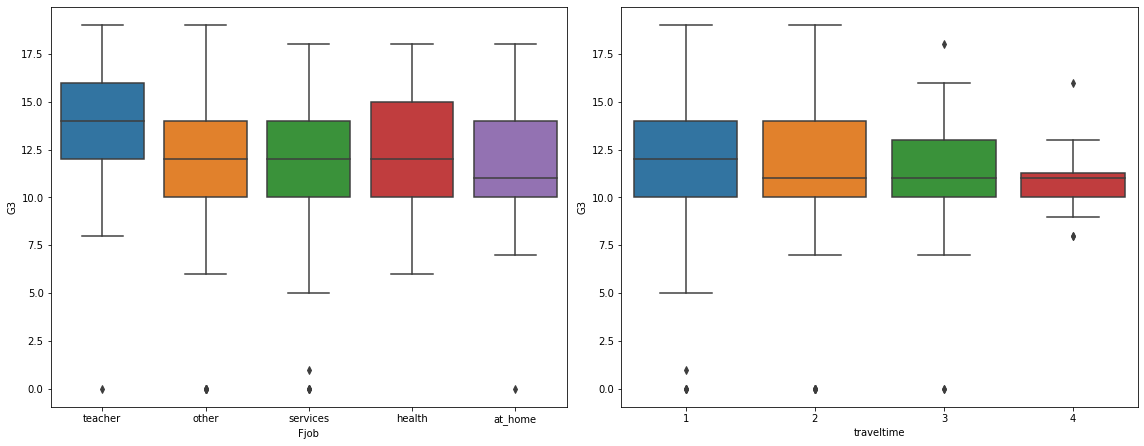

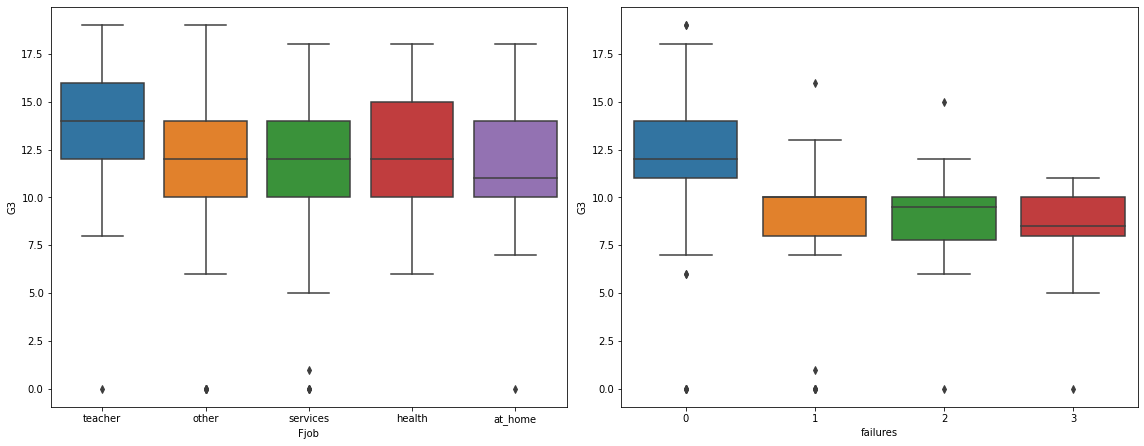

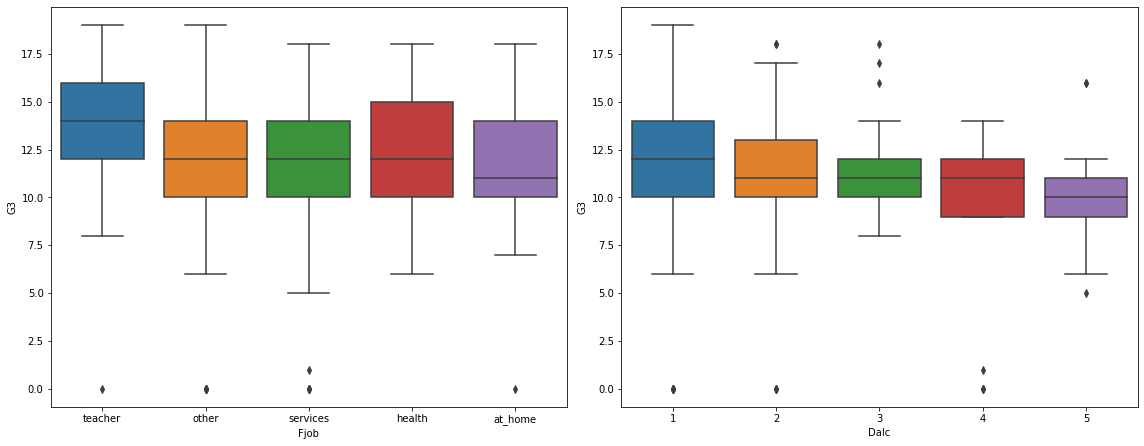

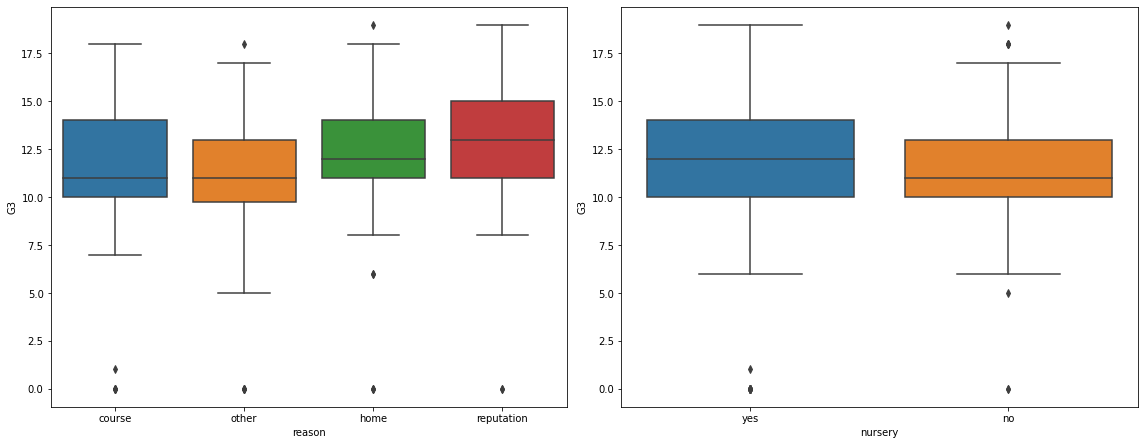

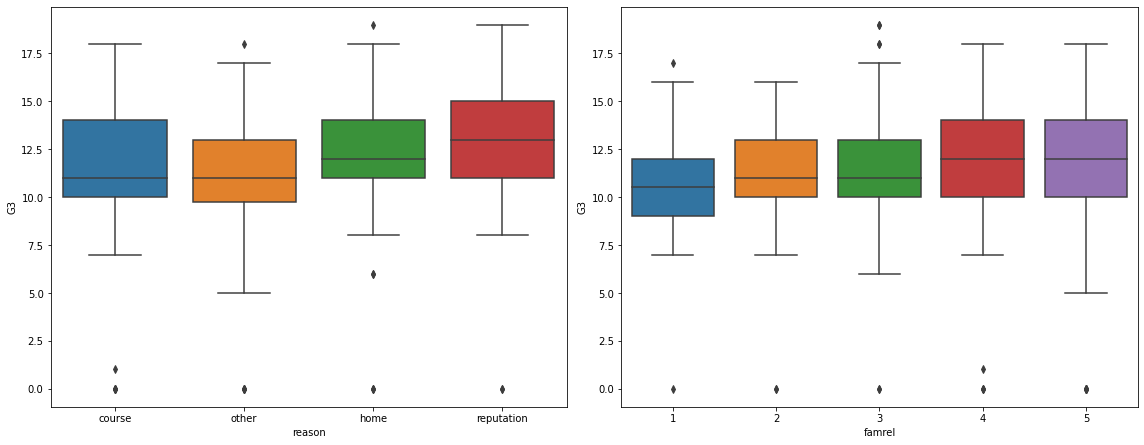

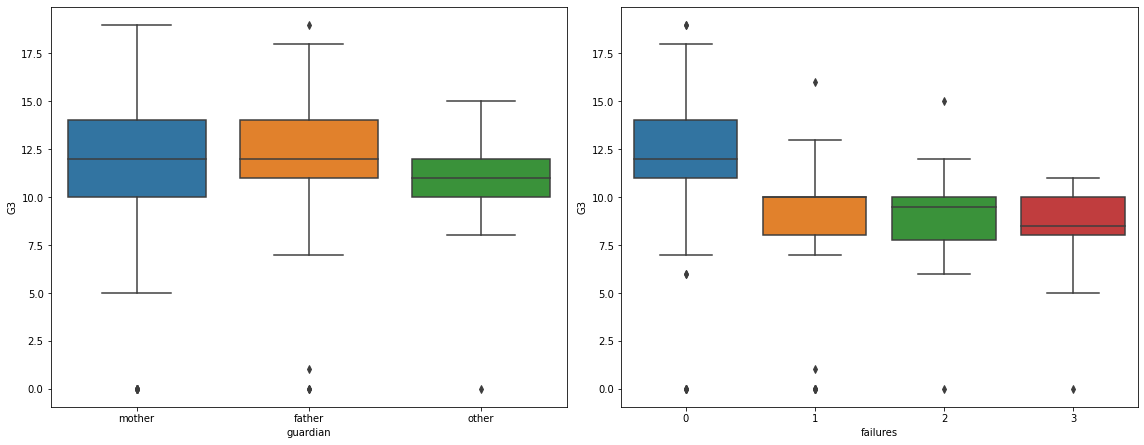

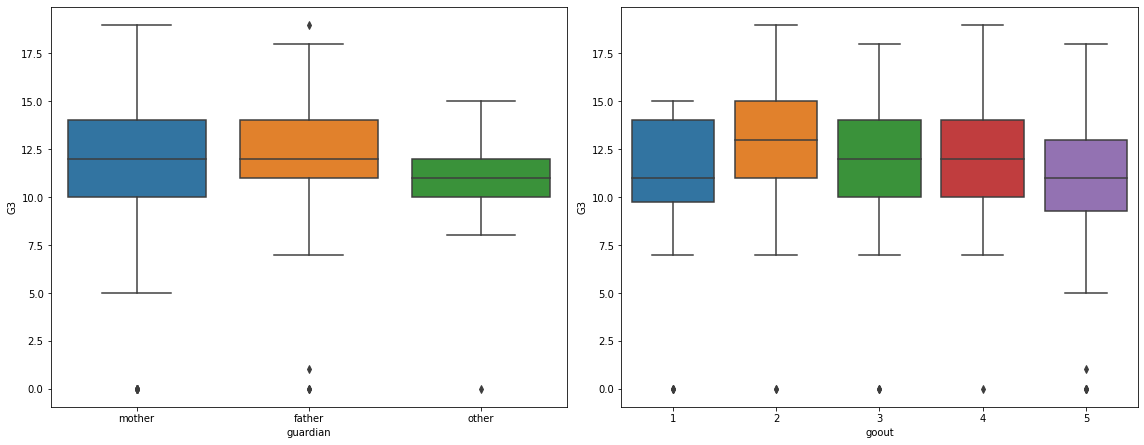

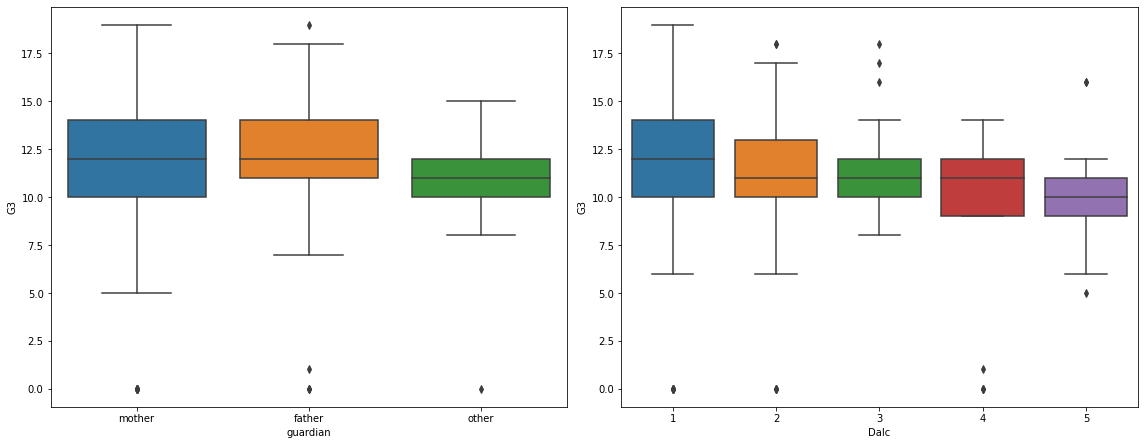

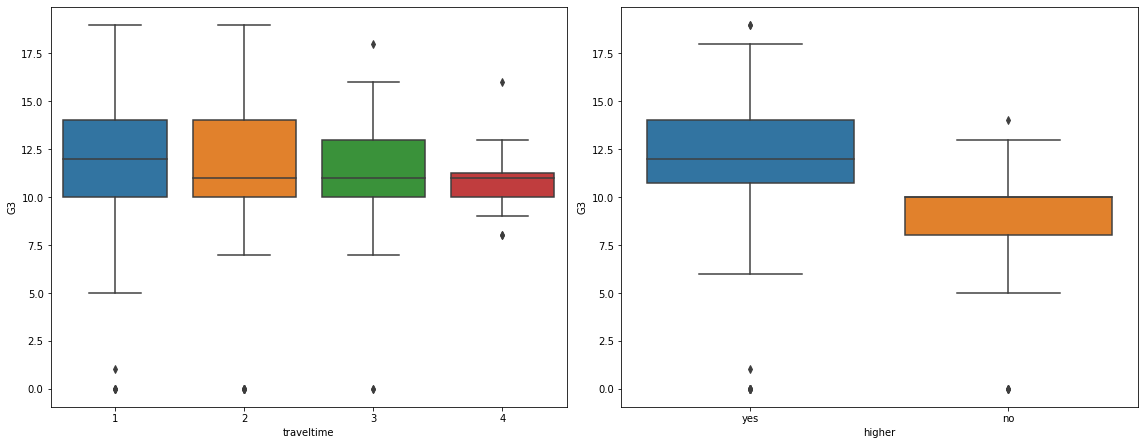

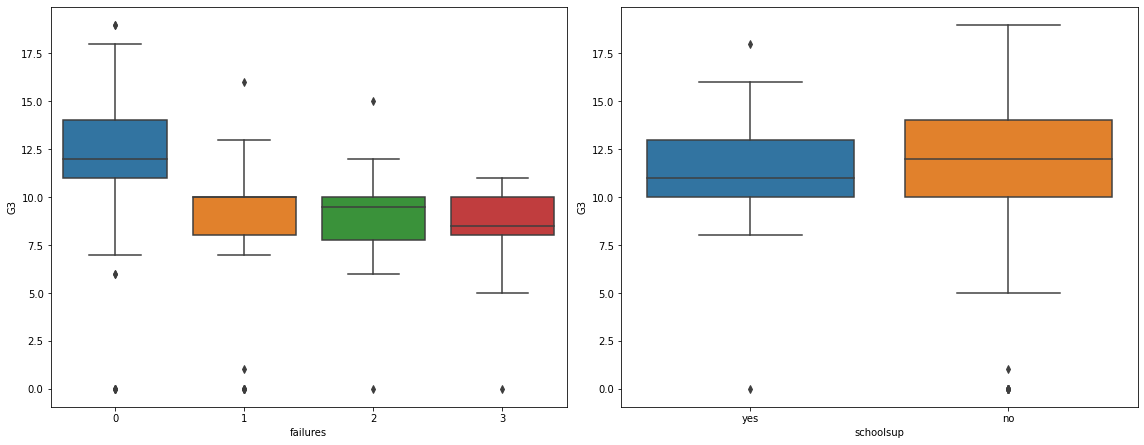

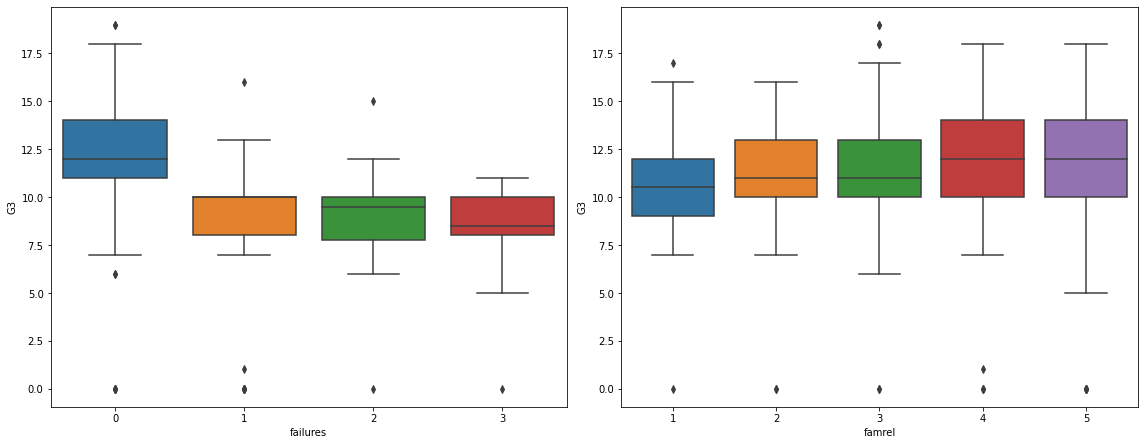

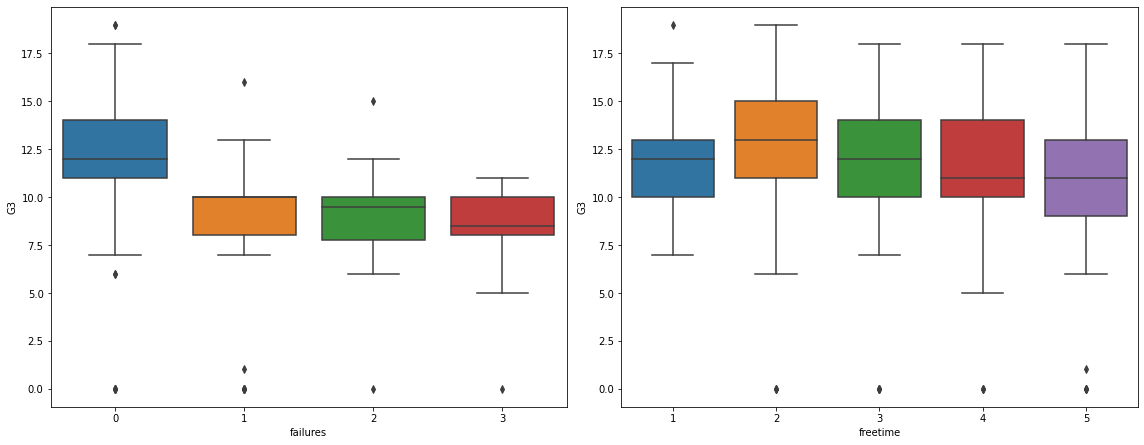

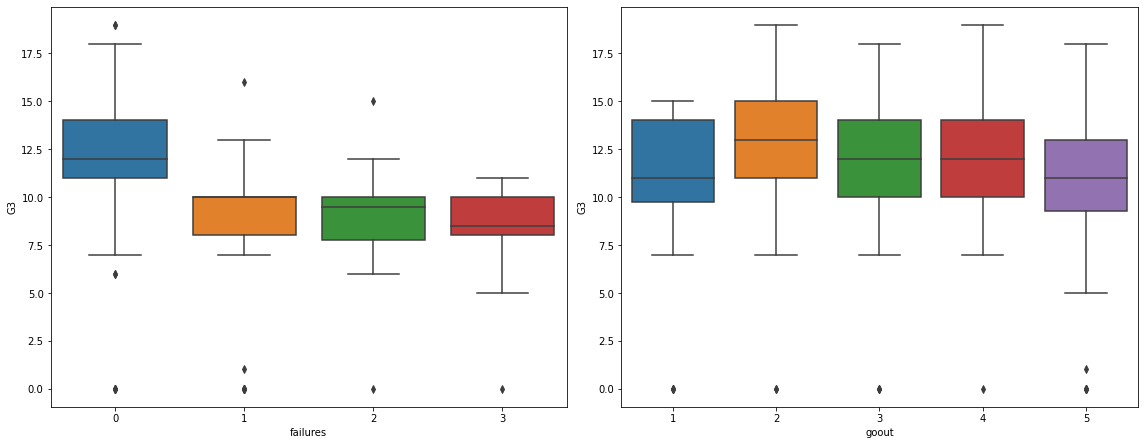

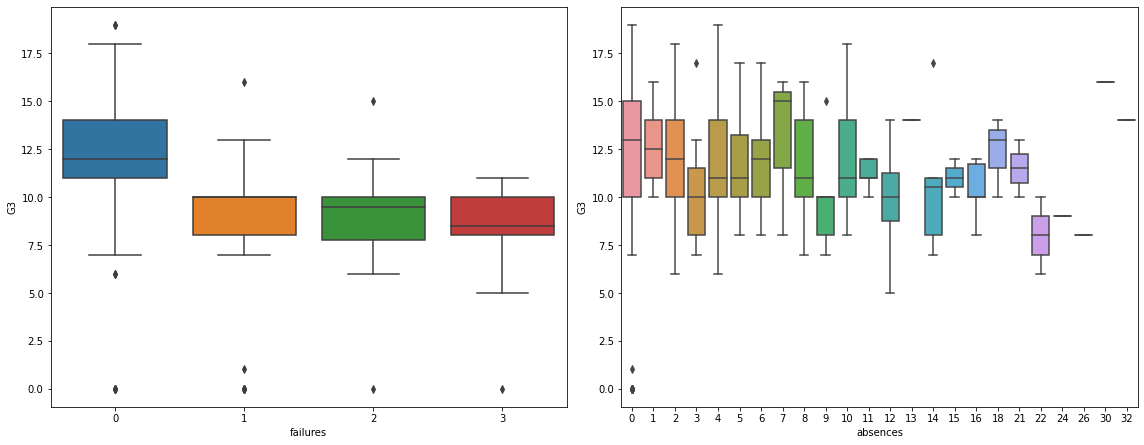

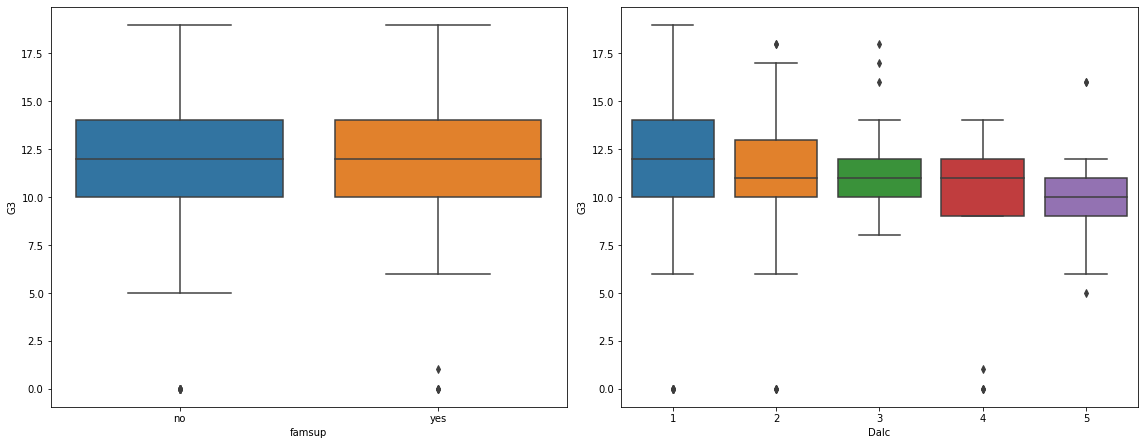

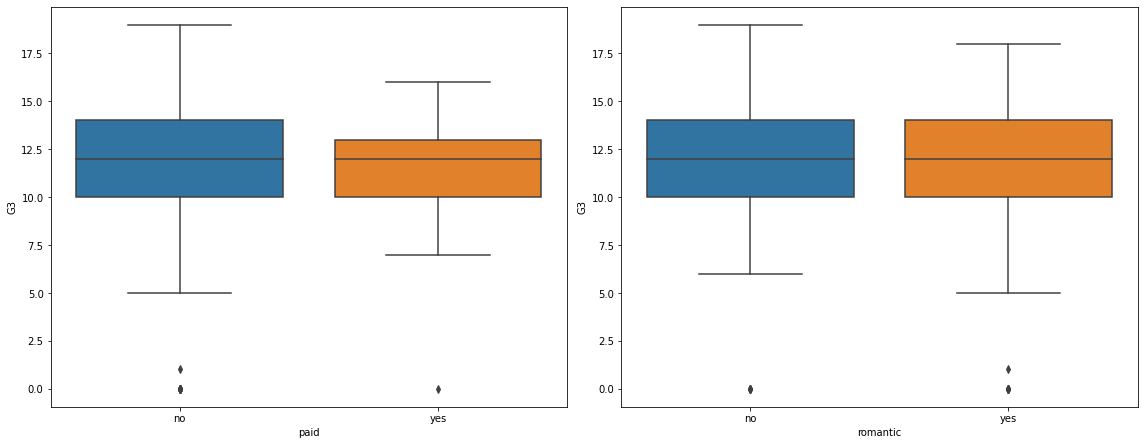

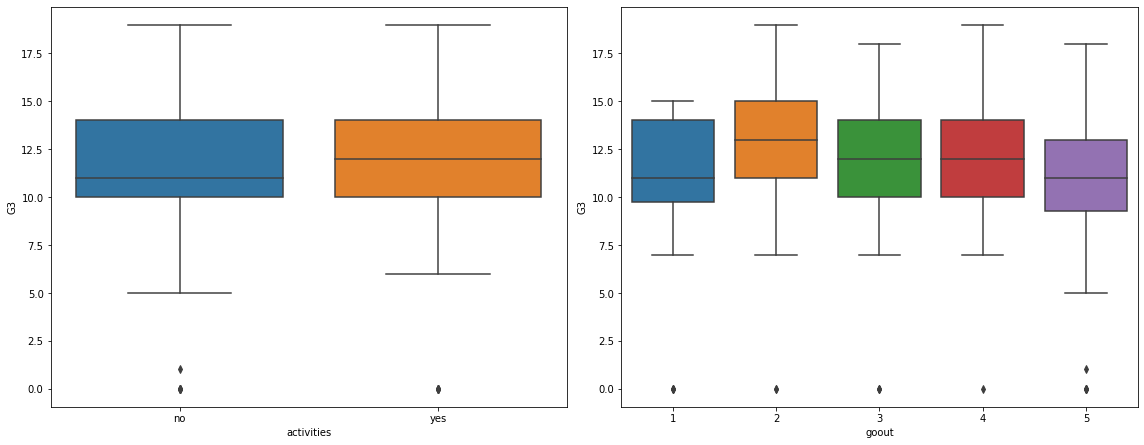

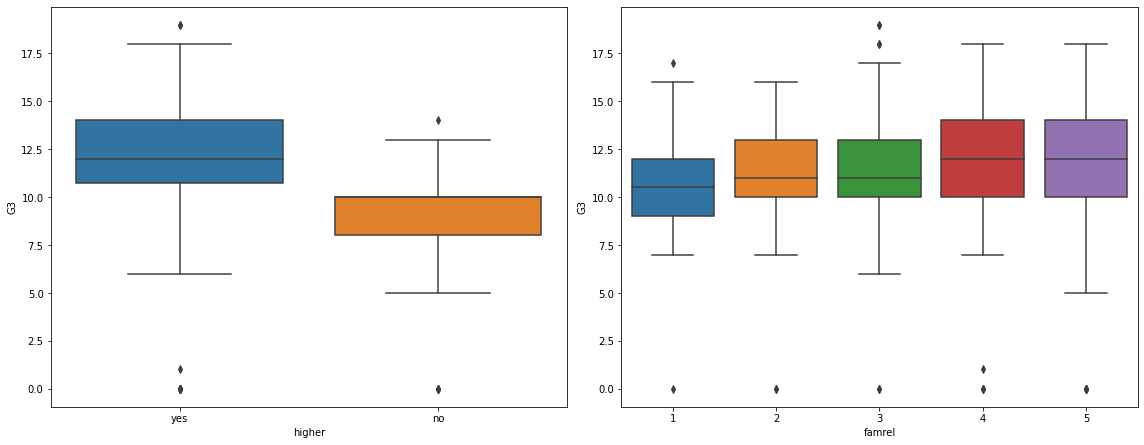

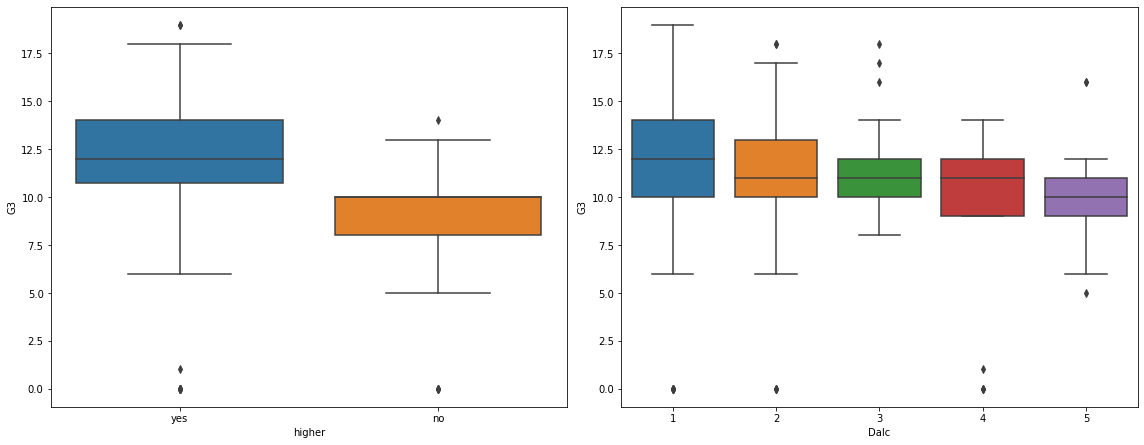

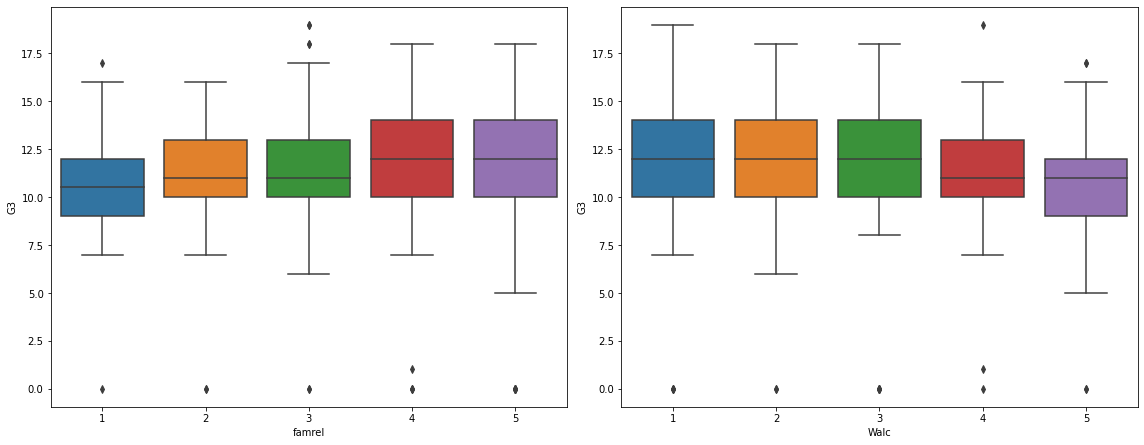

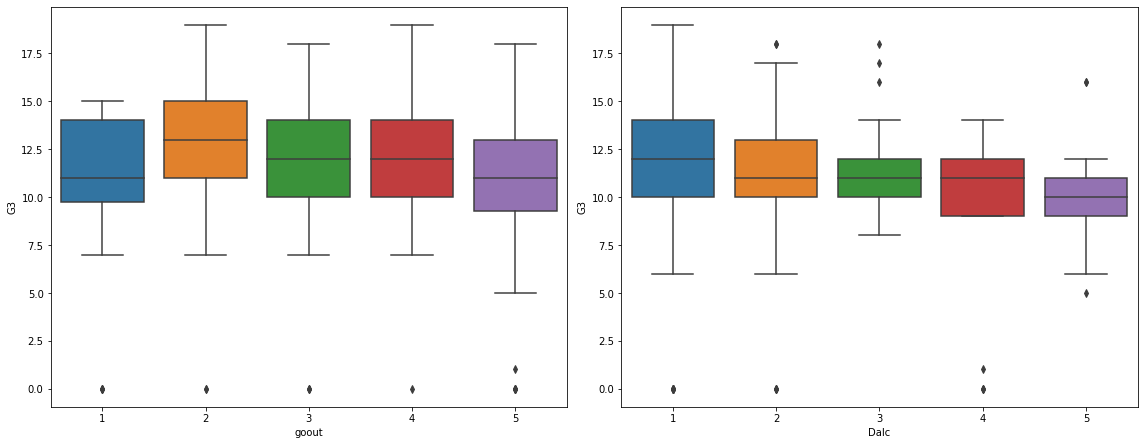

In [13]:
for sample in pair_attrs:
    nbox_plot([sample["attribute_1"], sample["attribute_2"]], (2, 2))

In [19]:
tmp_dfs = []
for sample in pair_attrs:
    tmp_df = por[[sample["attribute_1"], sample["attribute_2"], "G3"]]
    tmp_df.loc[:, f"{sample['attribute_1']}-{sample['attribute_2']}"] = tmp_df.loc[:, sample['attribute_1']].astype(str) + "-" + tmp_df.loc[:, sample['attribute_2']].astype(str)
    tmp_dfs.append(tmp_df)

/home/nguyennghiauit/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [20]:
tmp_dfs[1]

,school,activities,G3,school-activities
0,GP,no,11,GP-no
1,GP,no,11,GP-no
2,GP,no,12,GP-no
3,GP,yes,14,GP-yes
4,GP,no,13,GP-no
...,...,...,...,...
644,MS,yes,10,MS-yes
645,MS,no,16,MS-no
646,MS,yes,9,MS-yes
647,MS,no,10,MS-no


/tmp/ipykernel_7988/3957139089.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 12))


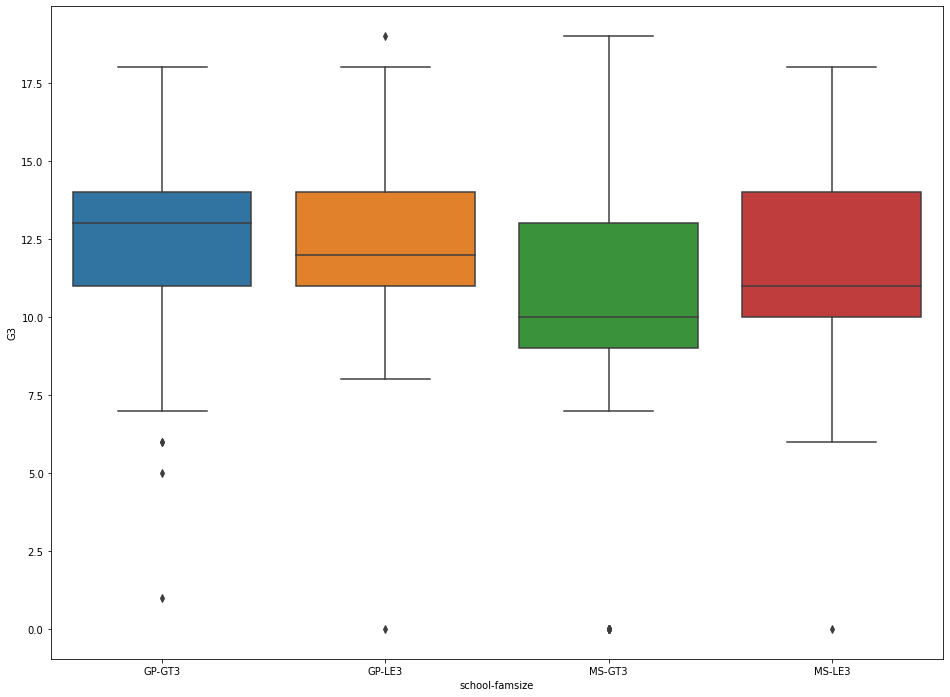

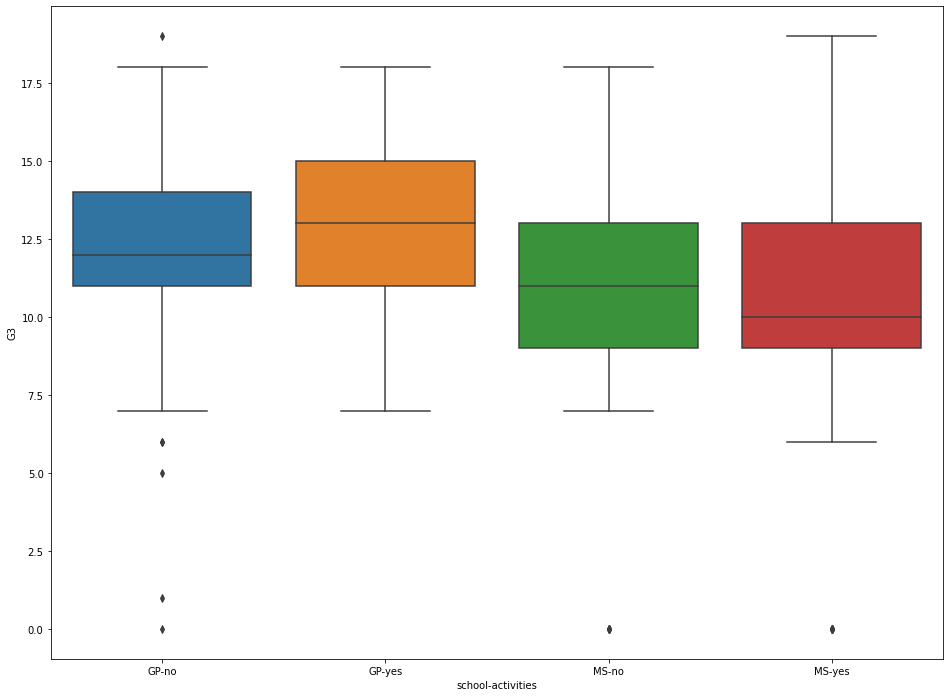

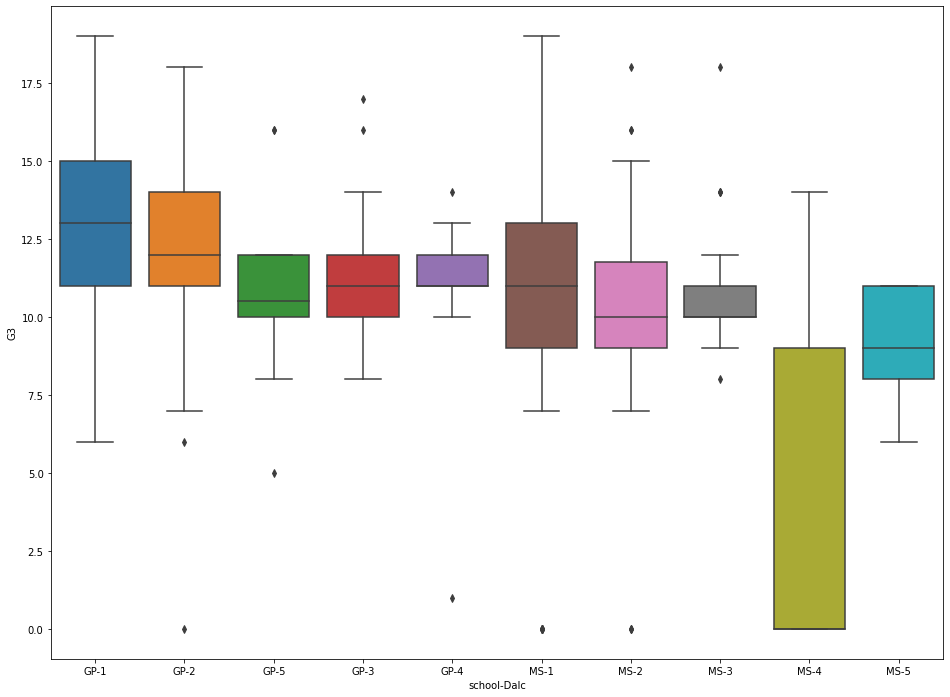

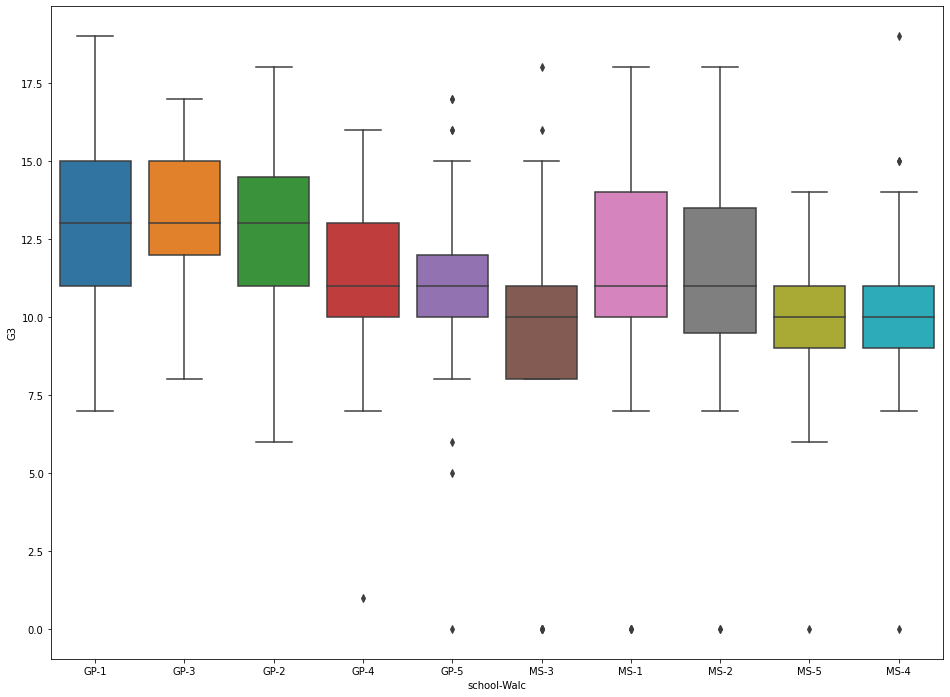

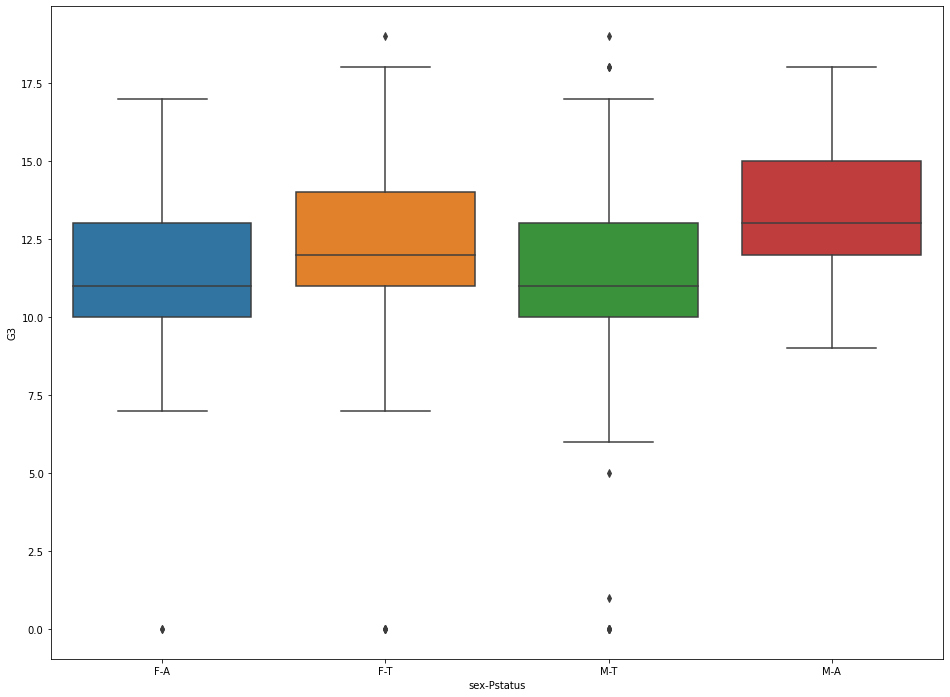

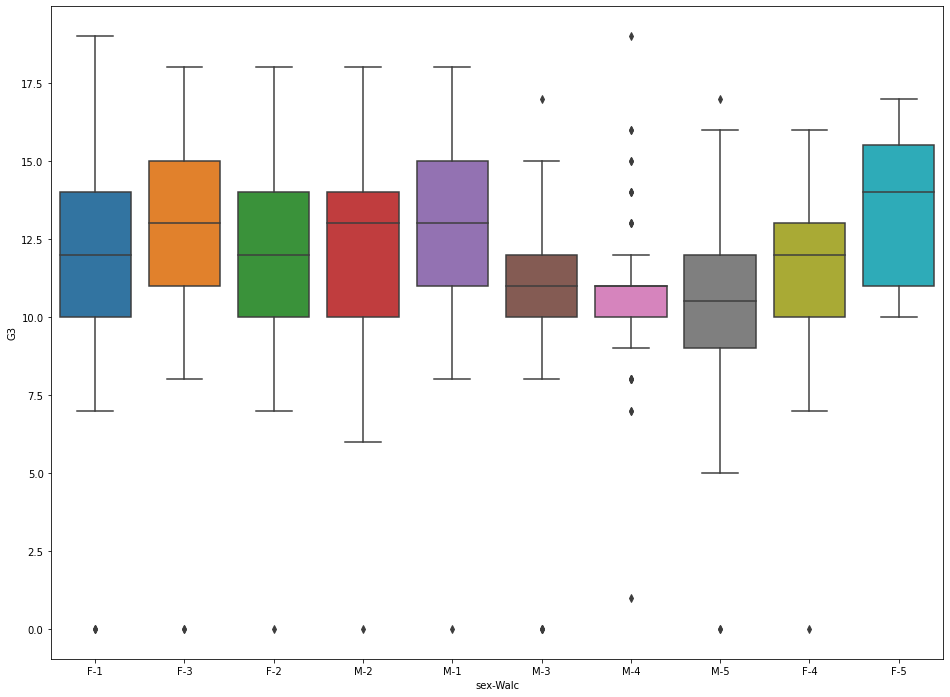

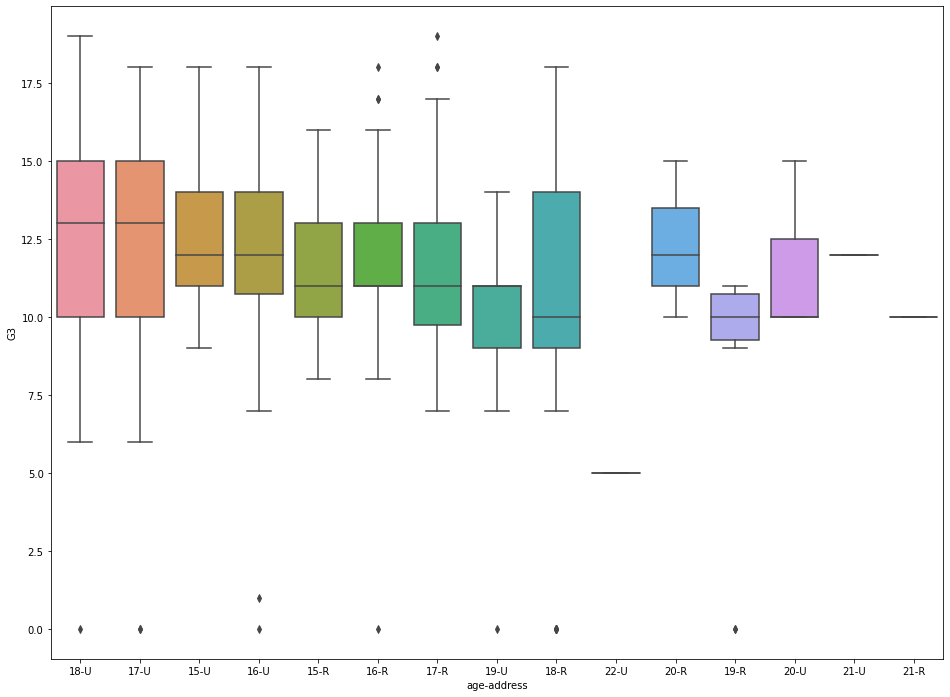

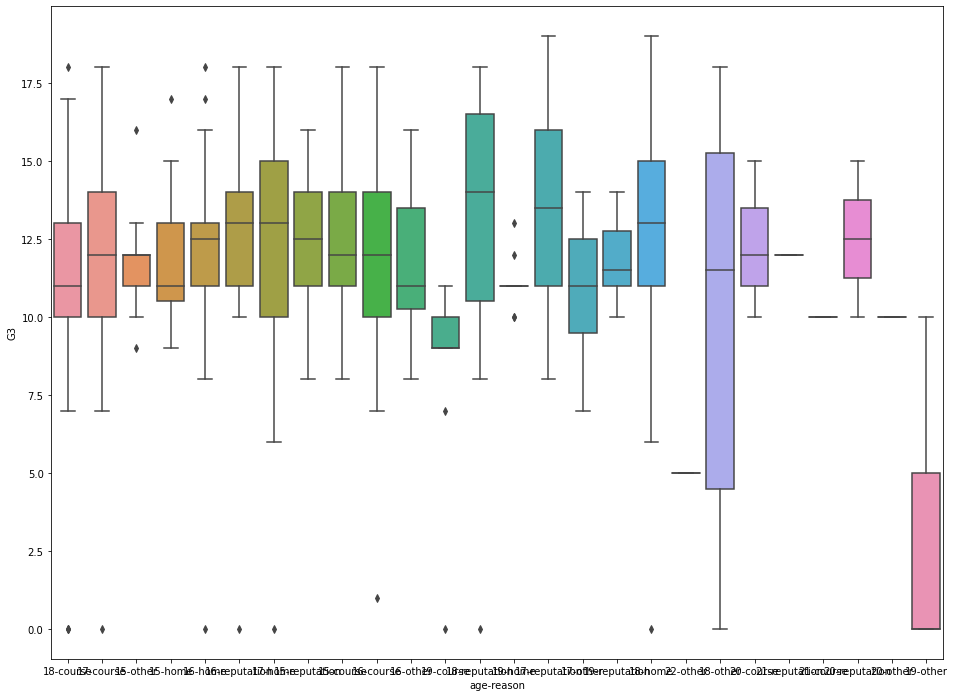

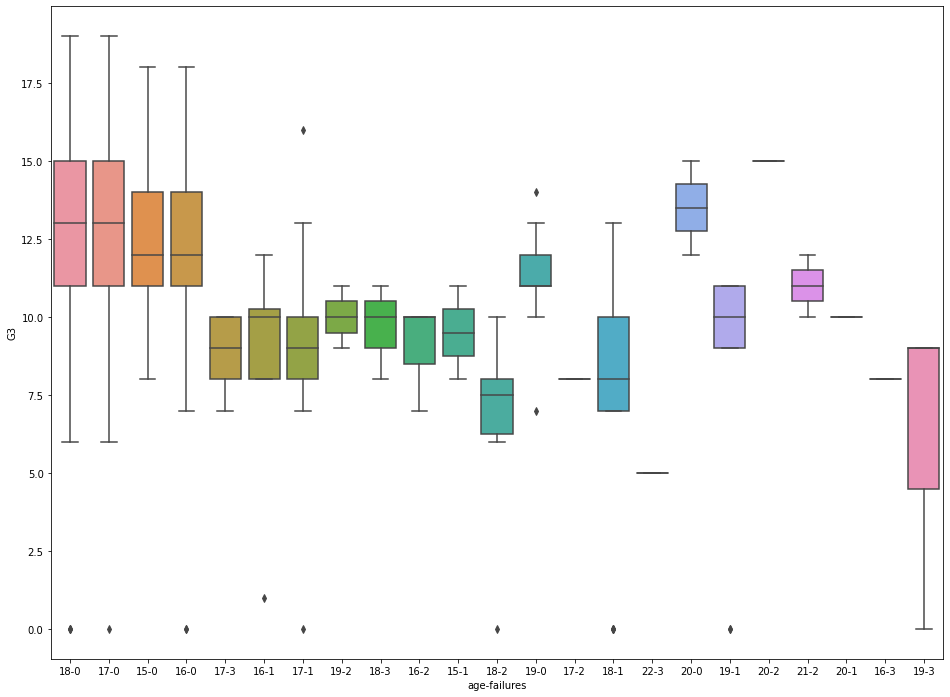

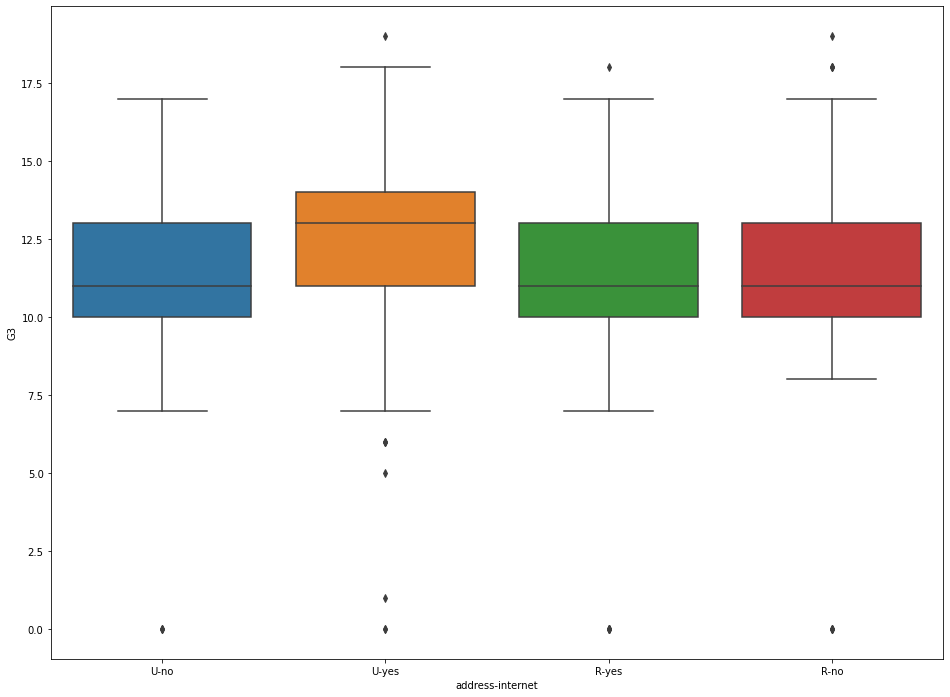

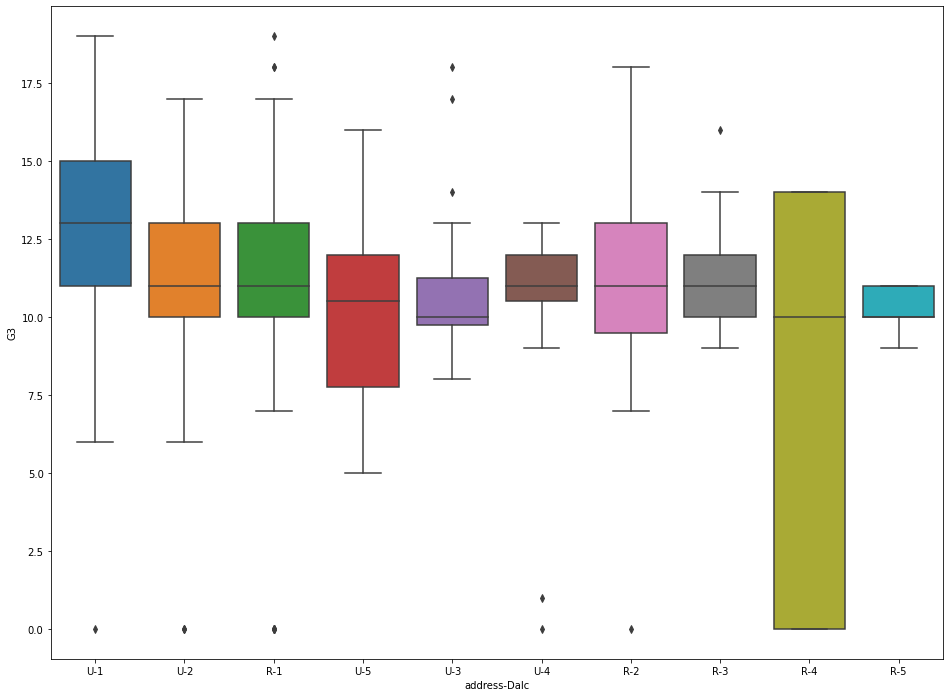

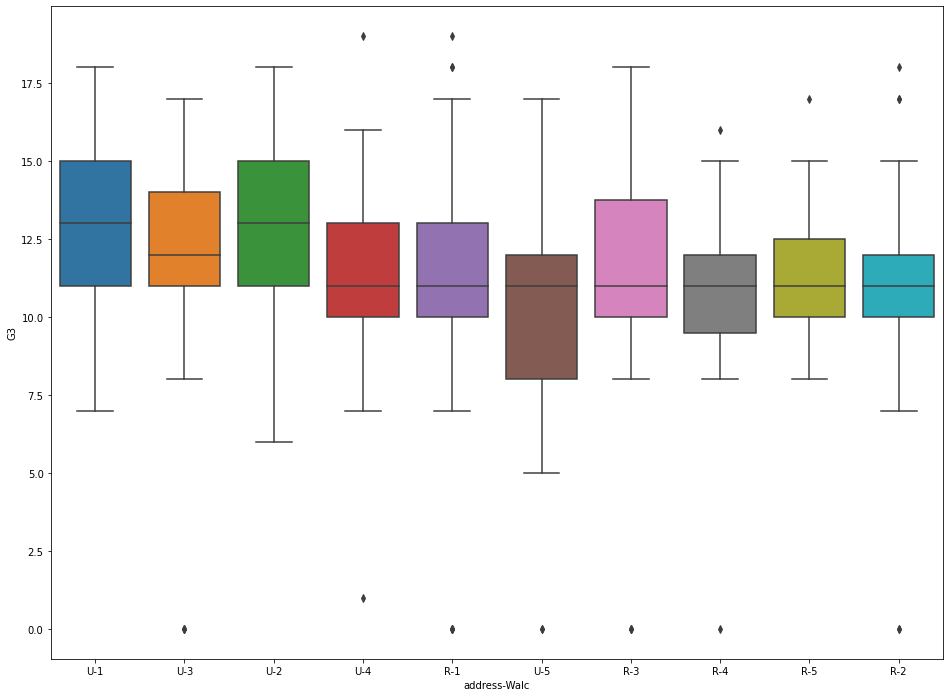

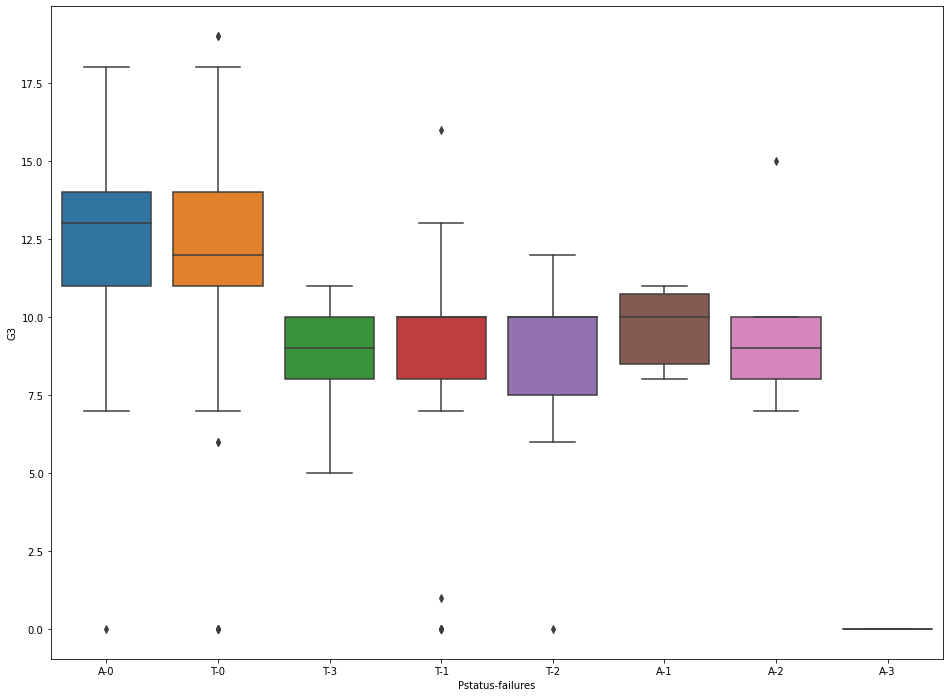

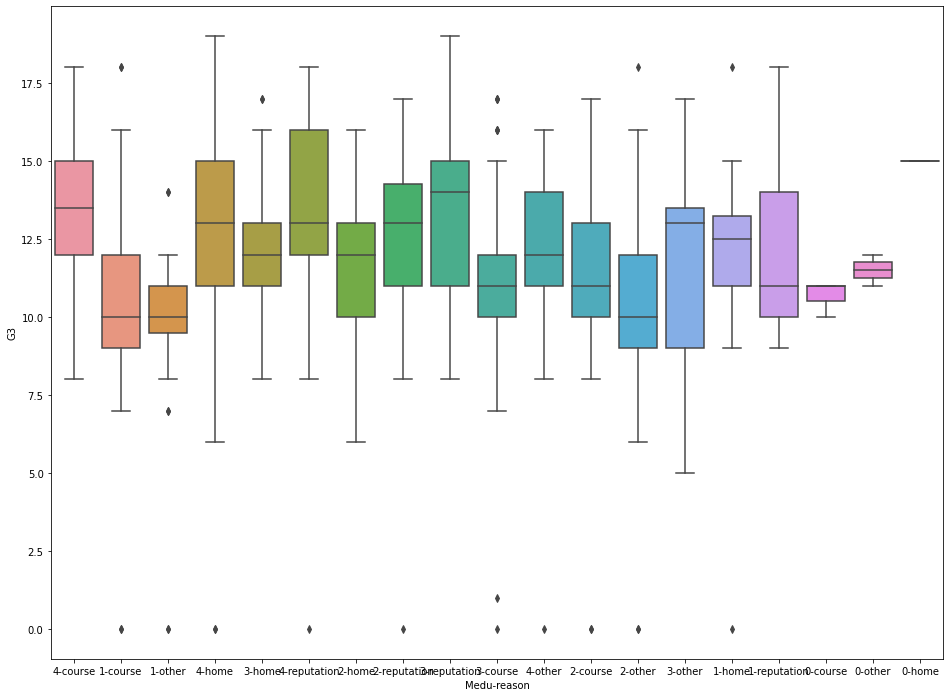

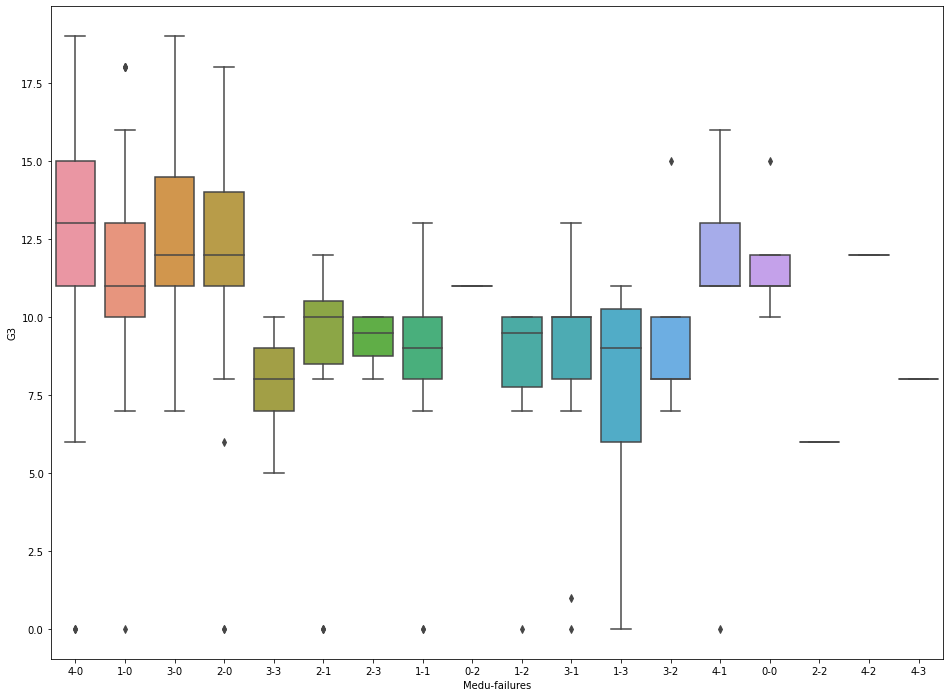

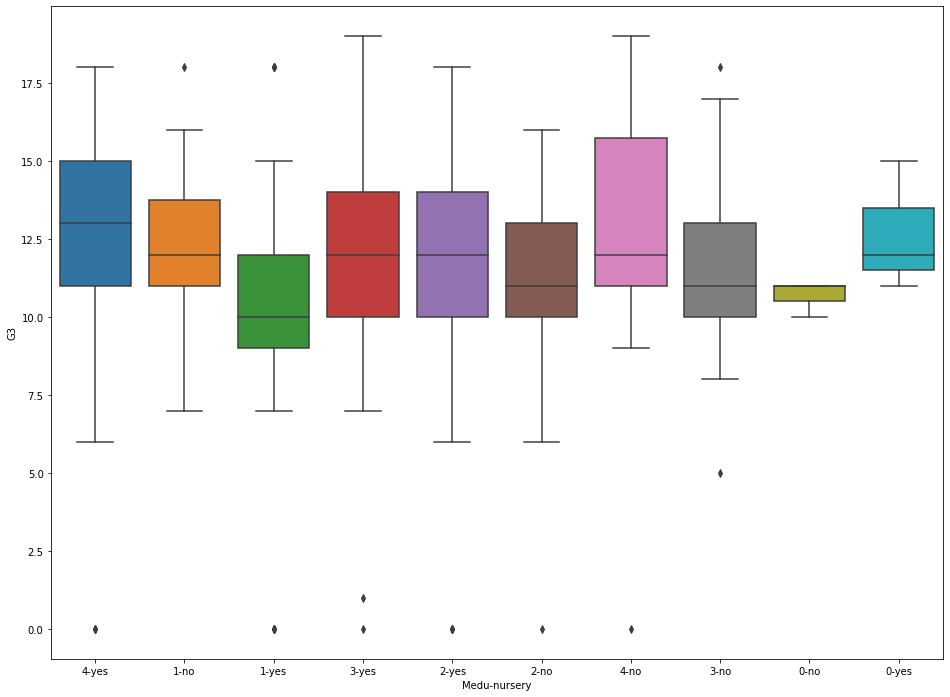

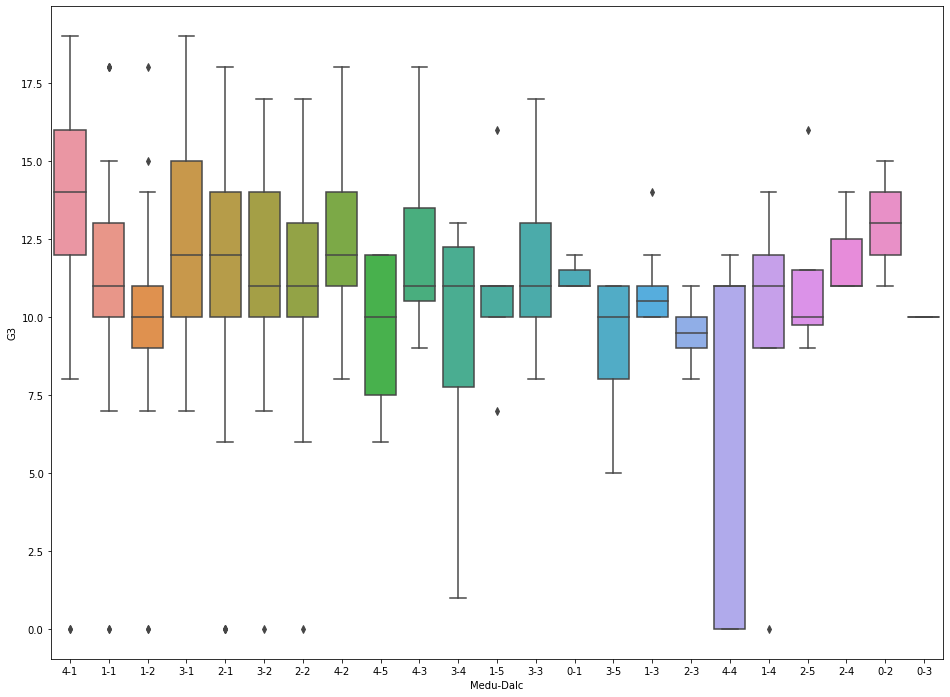

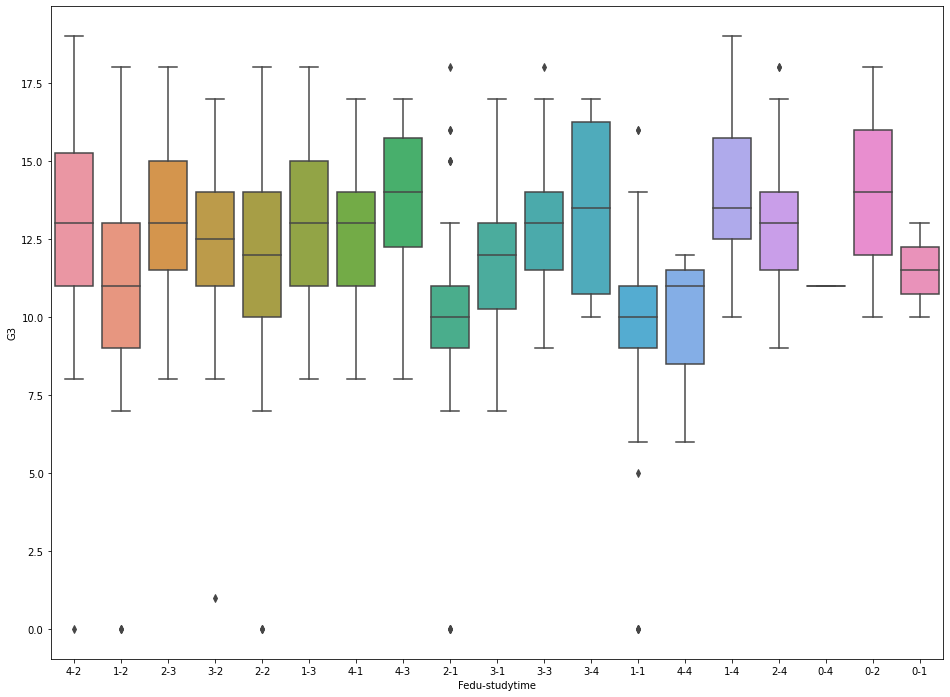

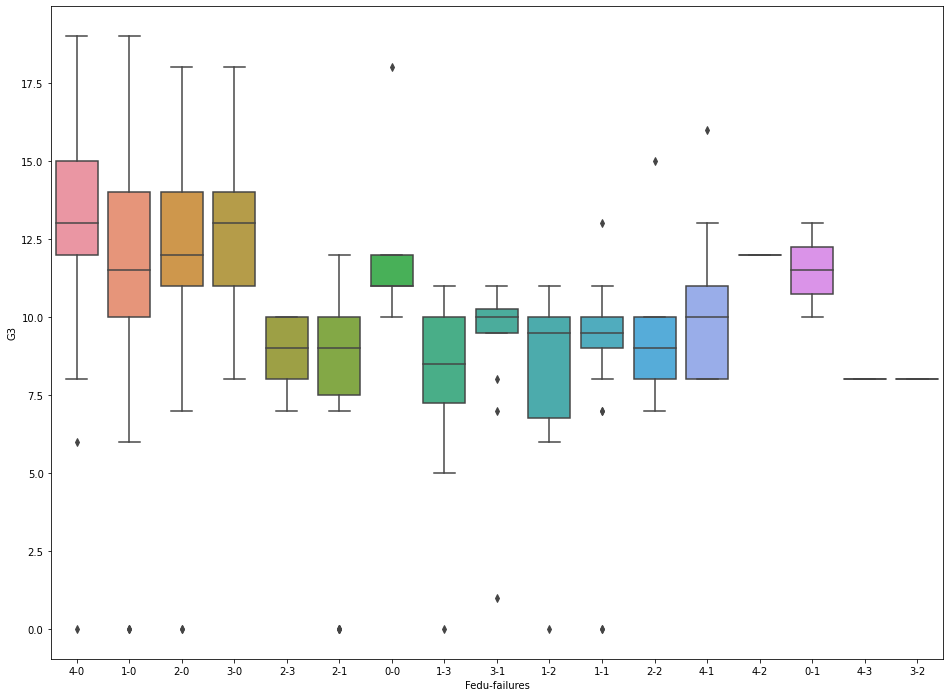

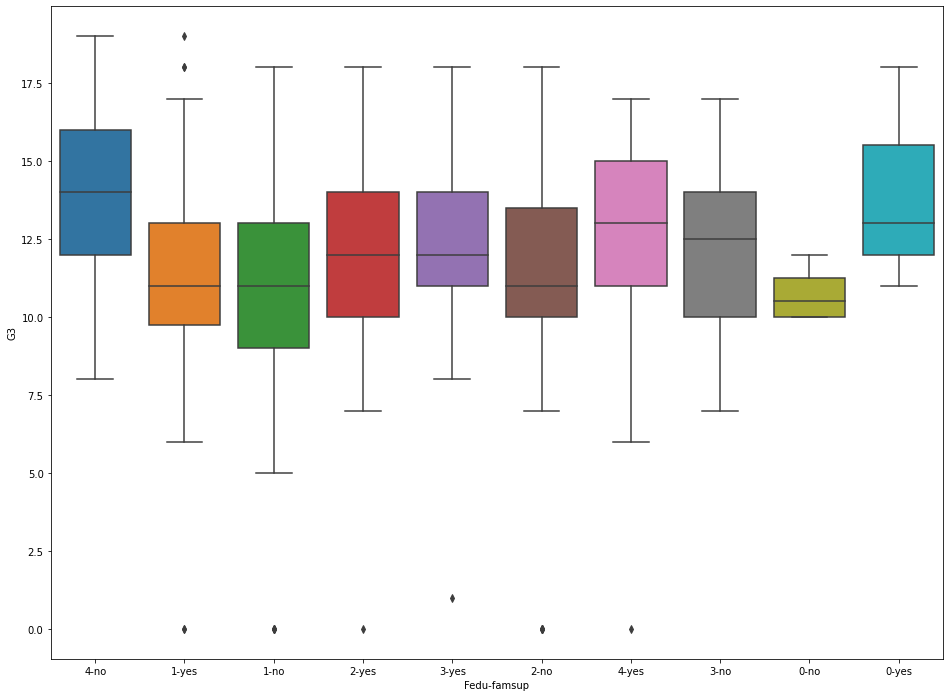

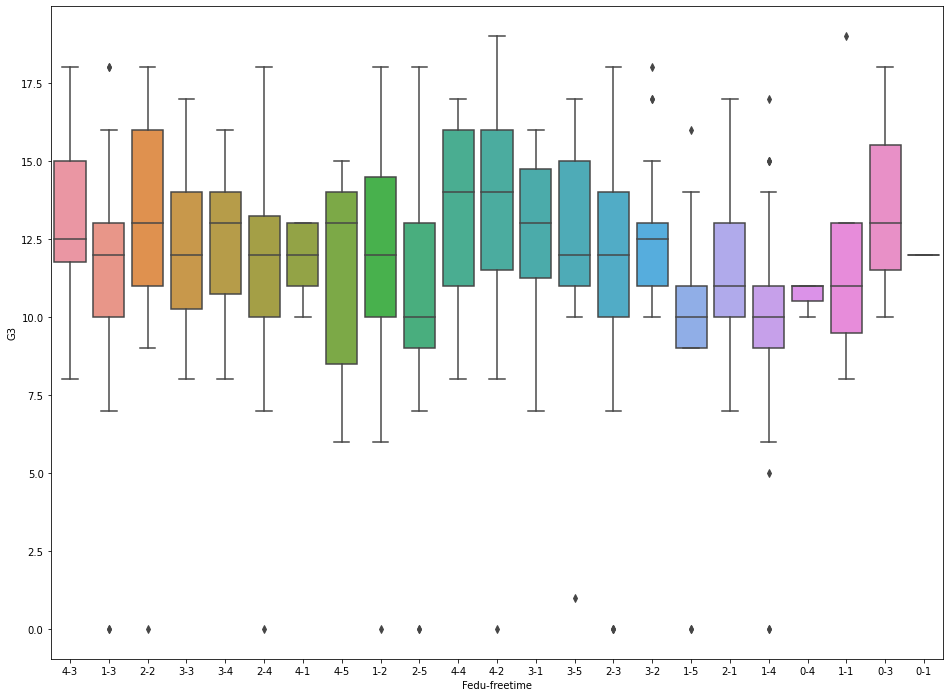

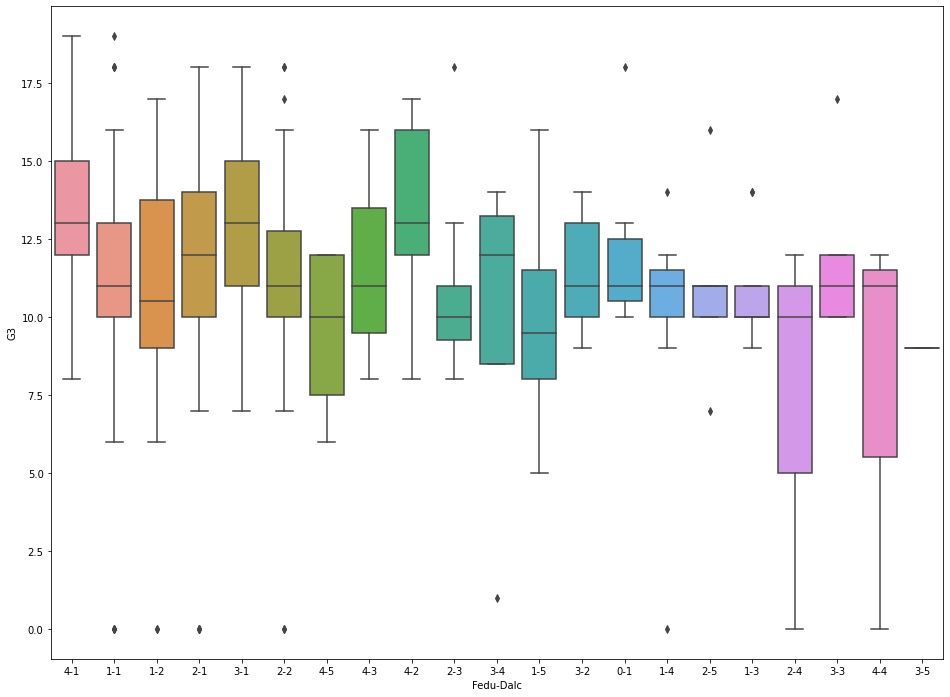

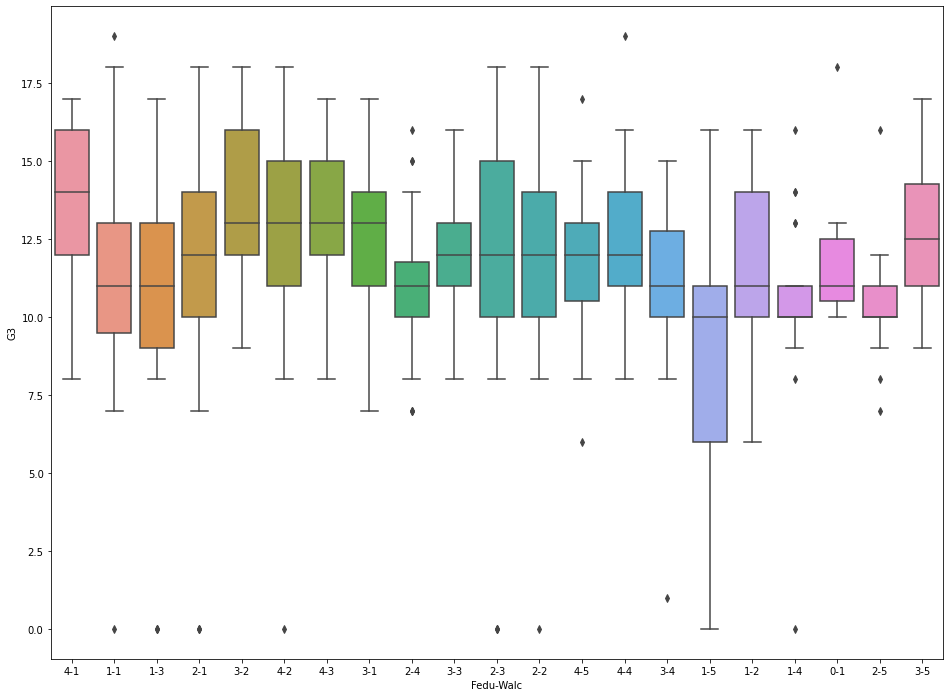

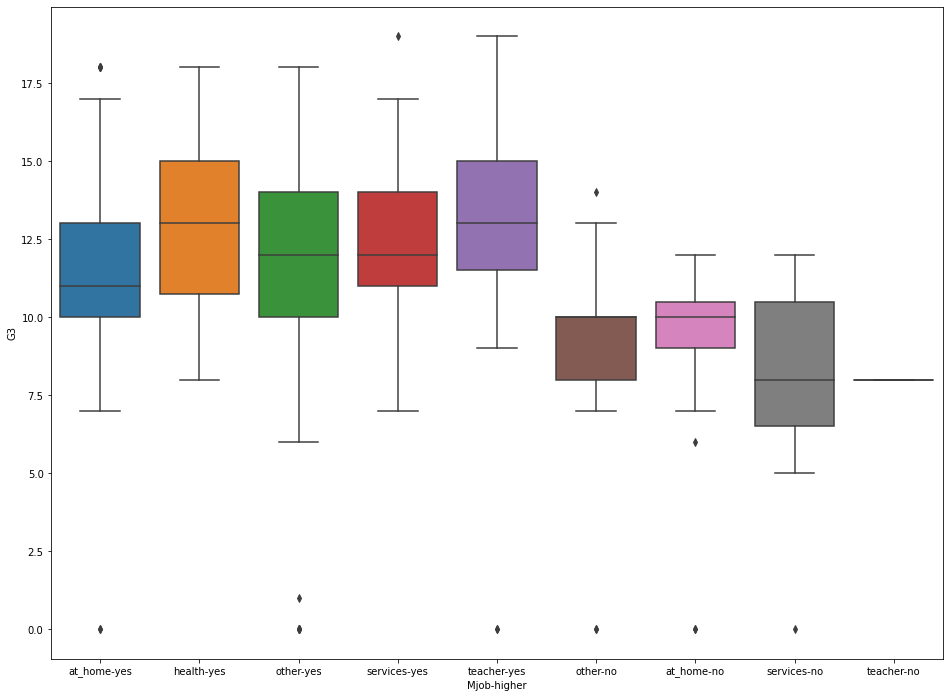

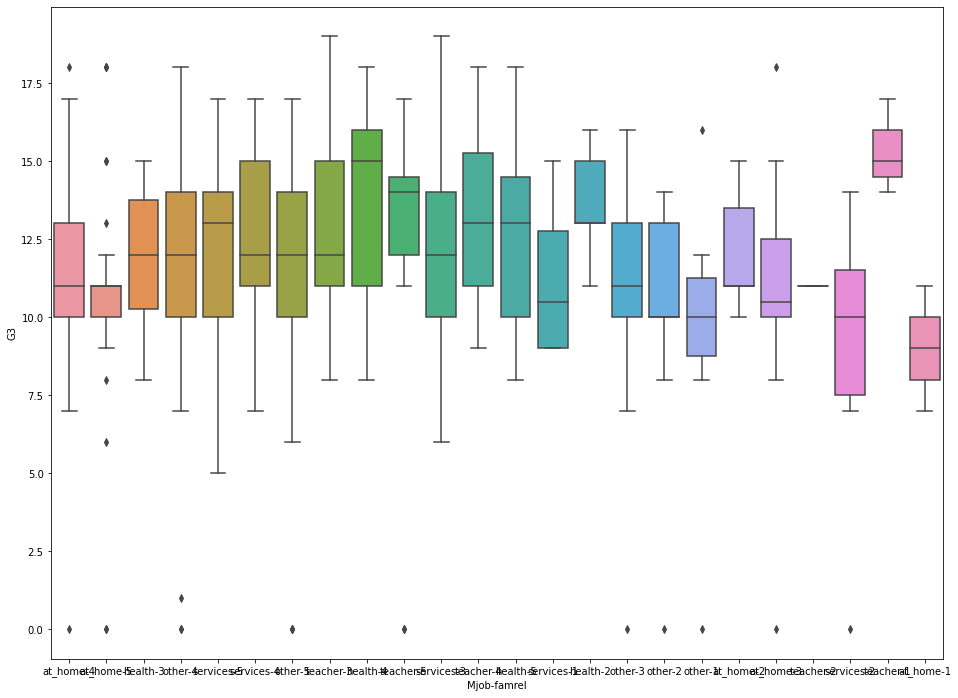

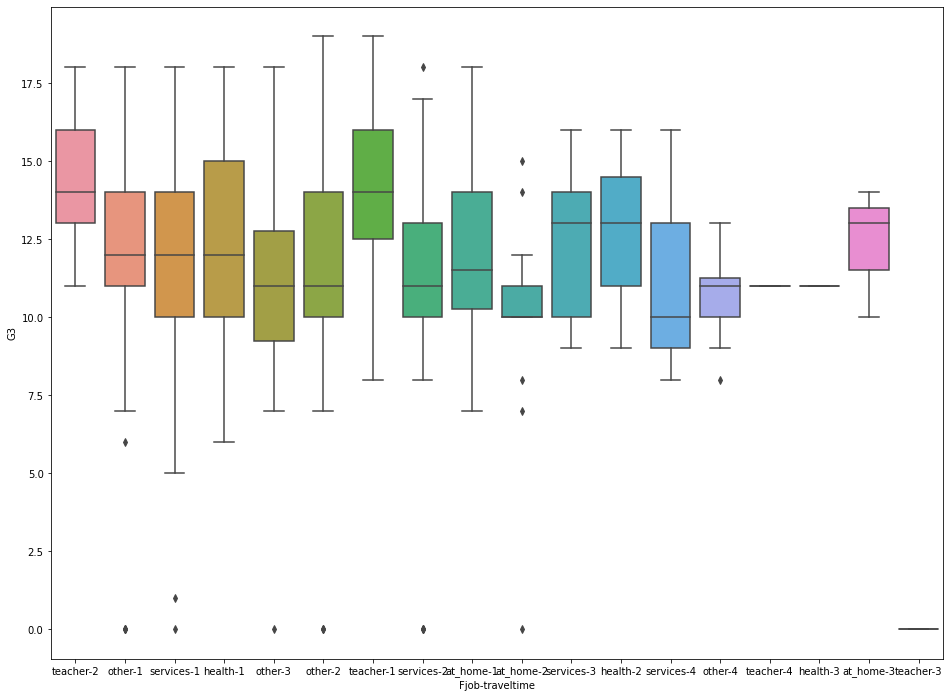

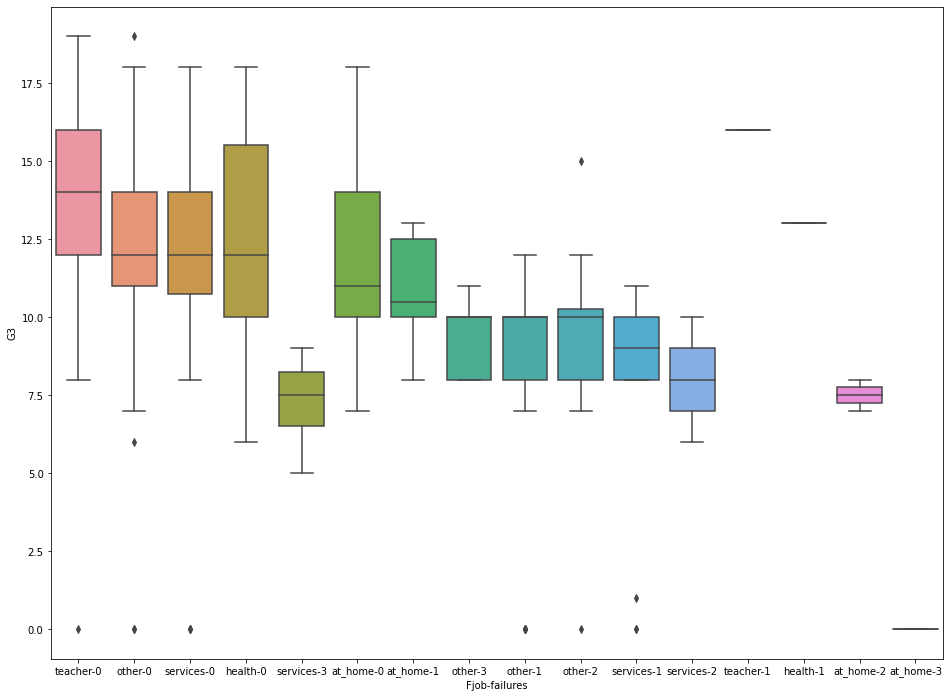

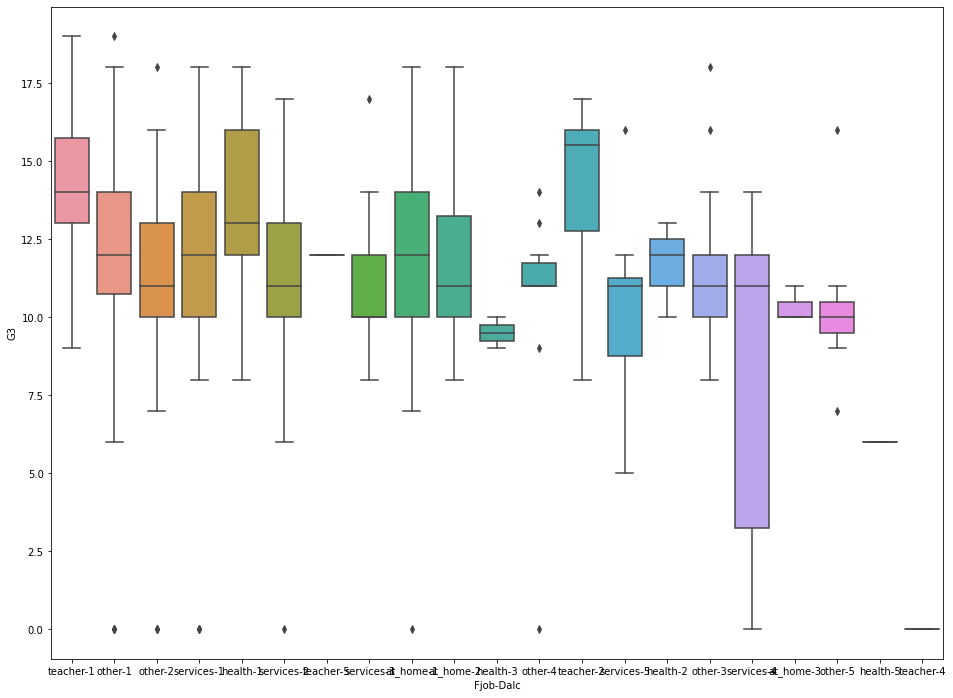

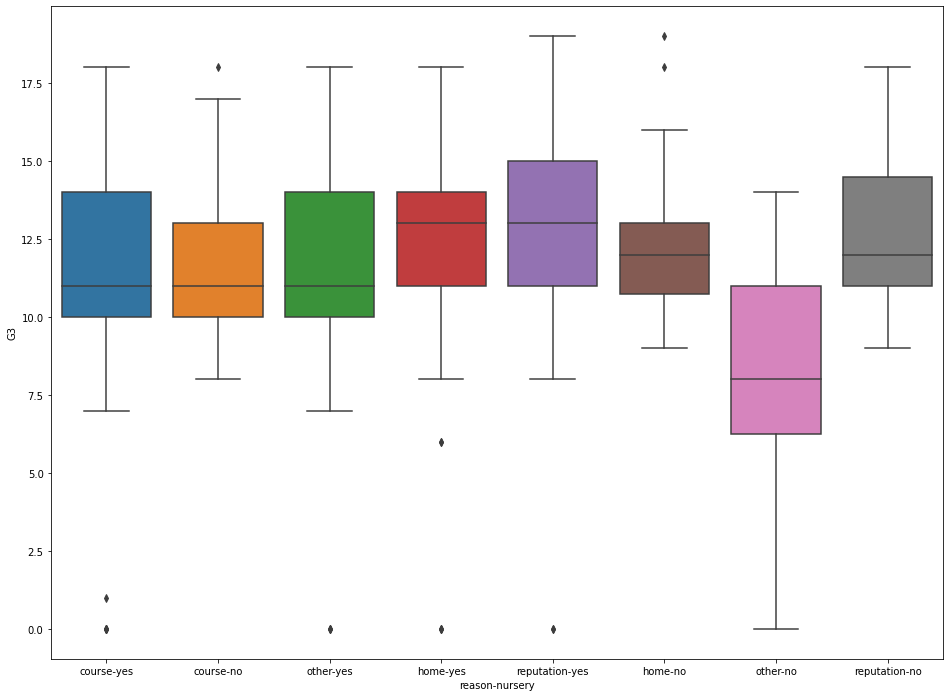

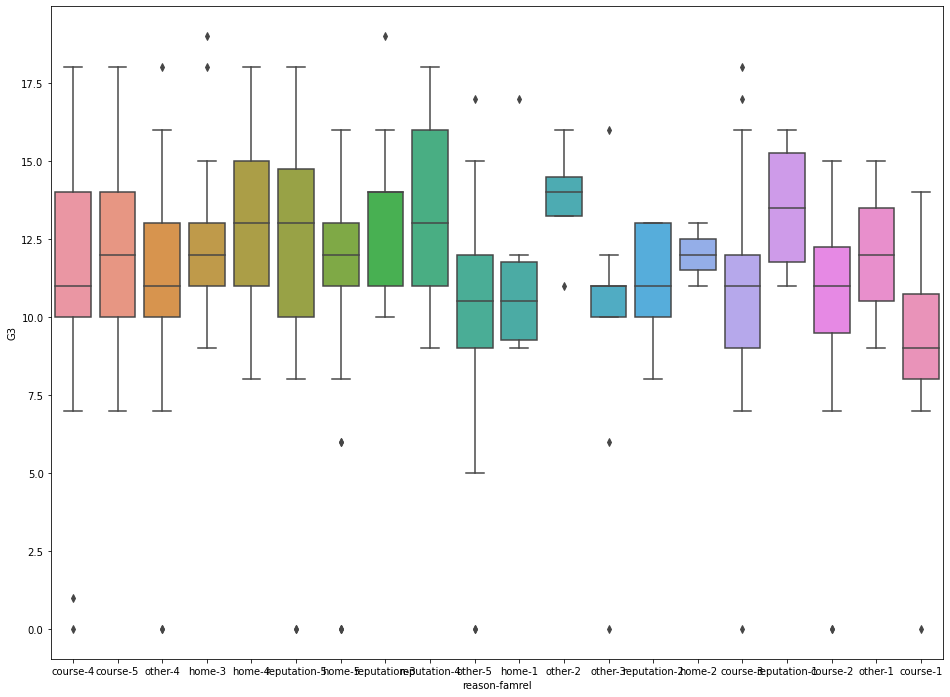

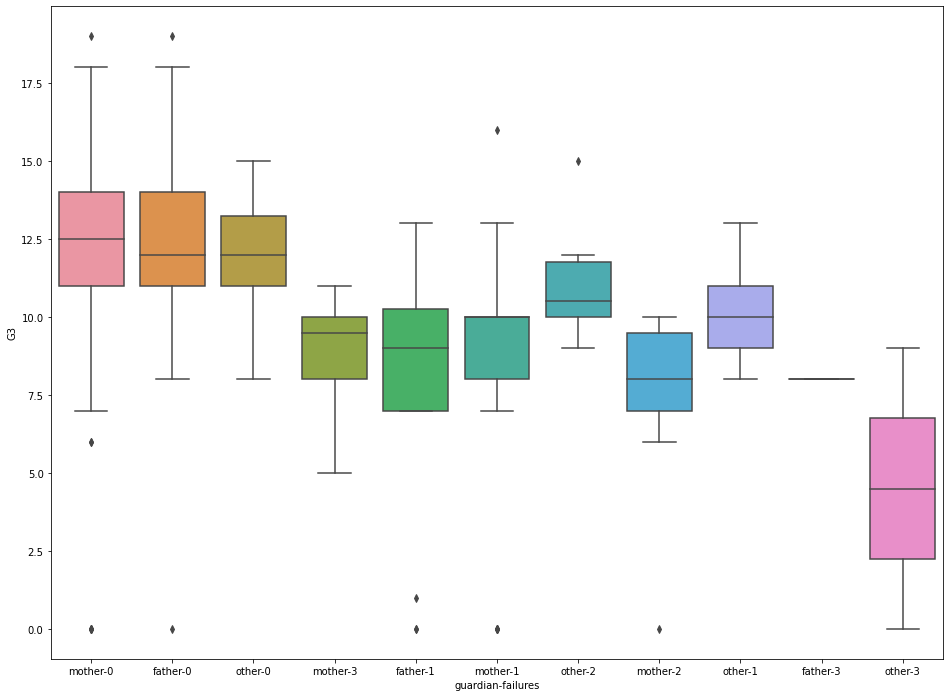

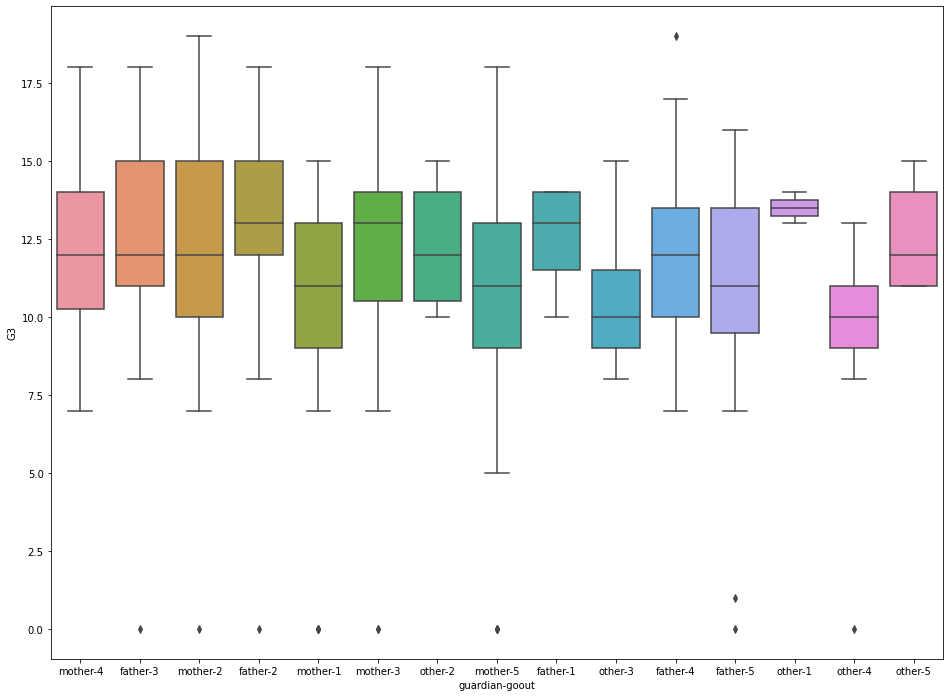

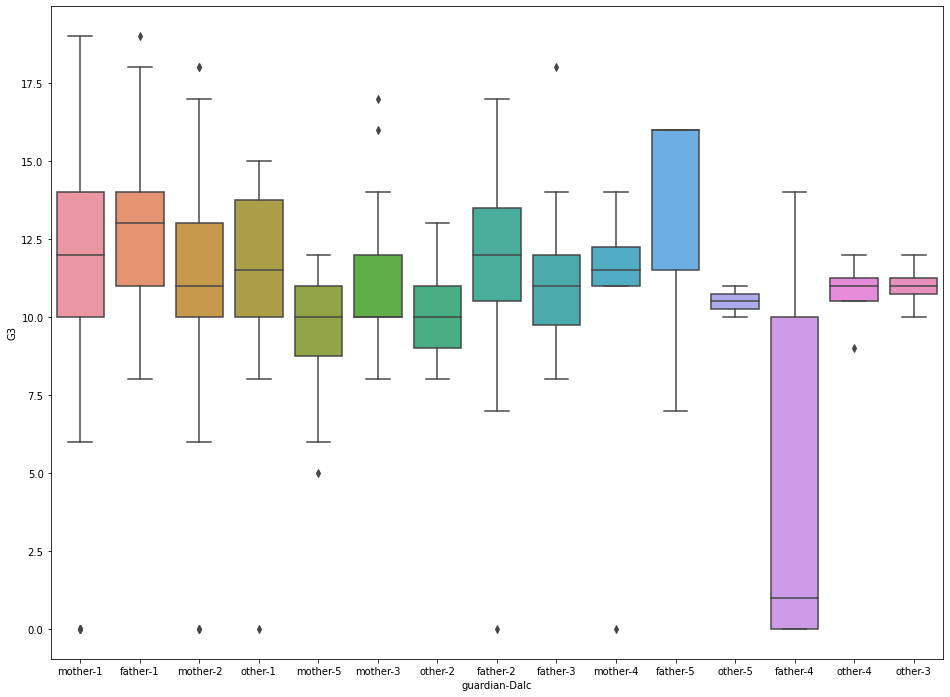

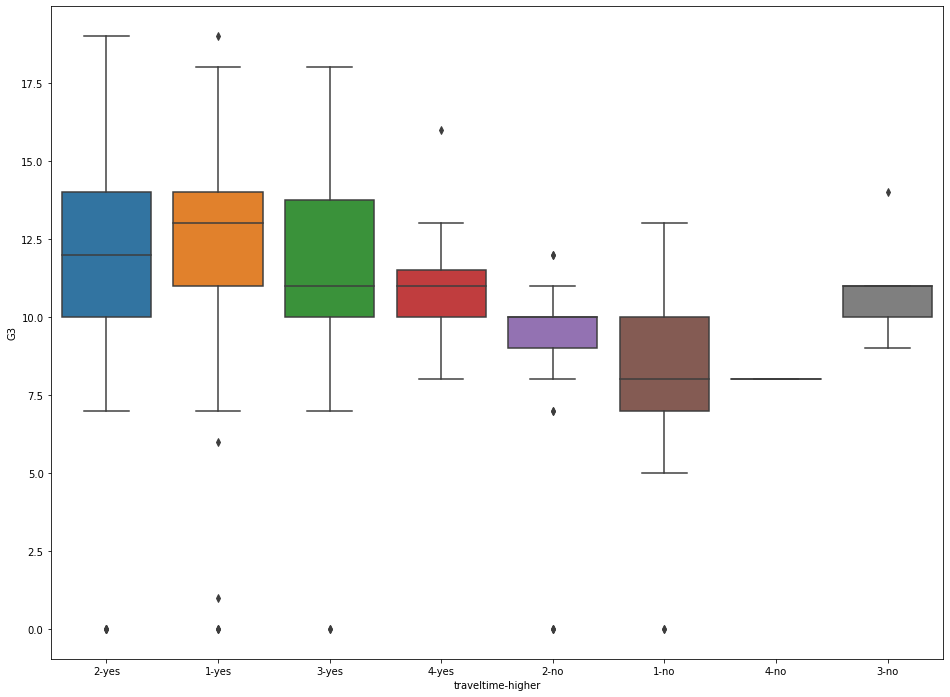

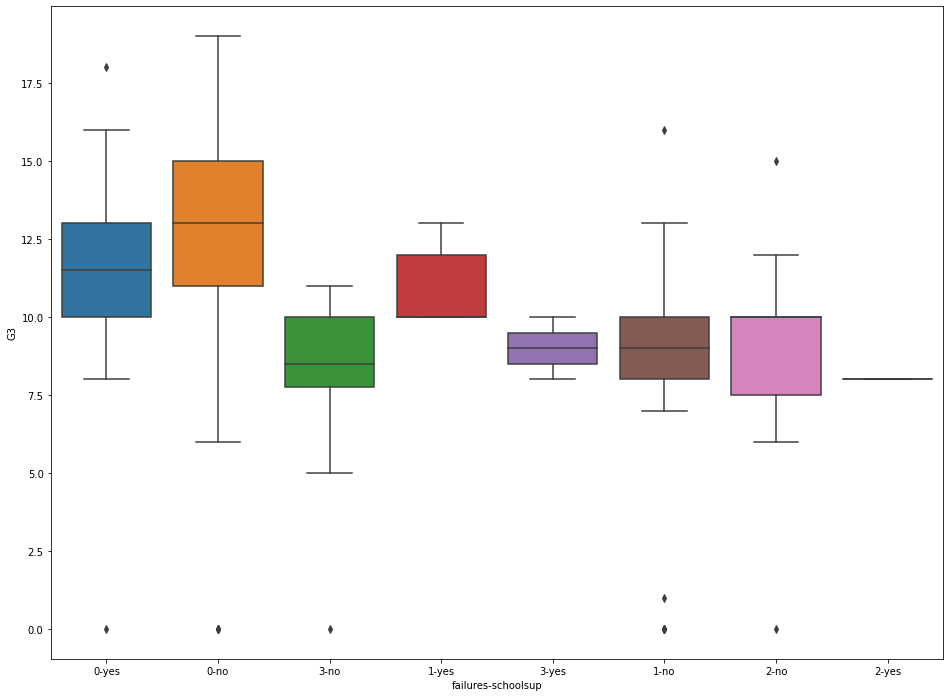

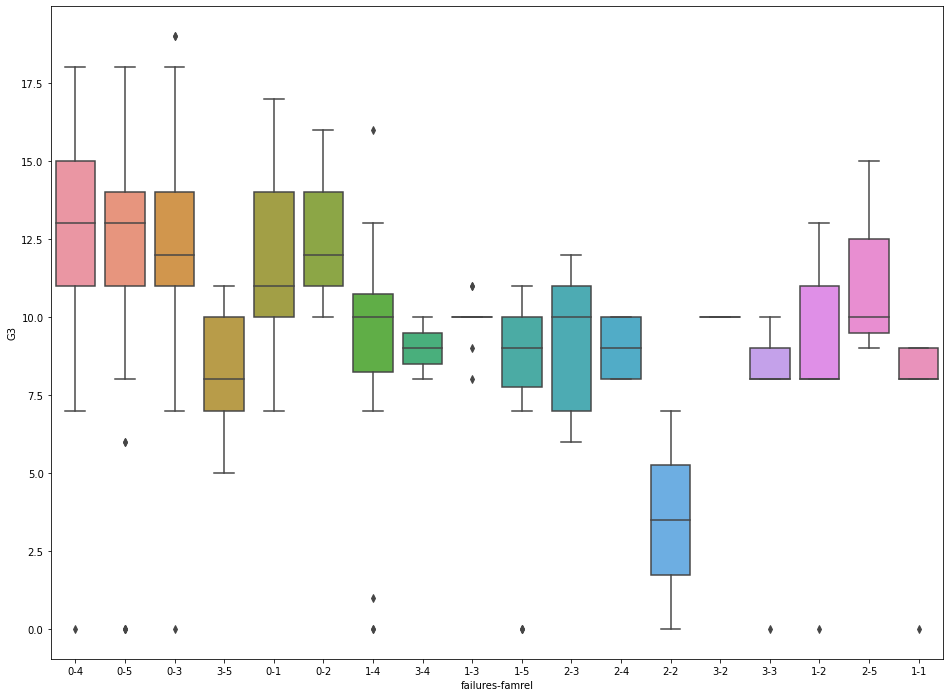

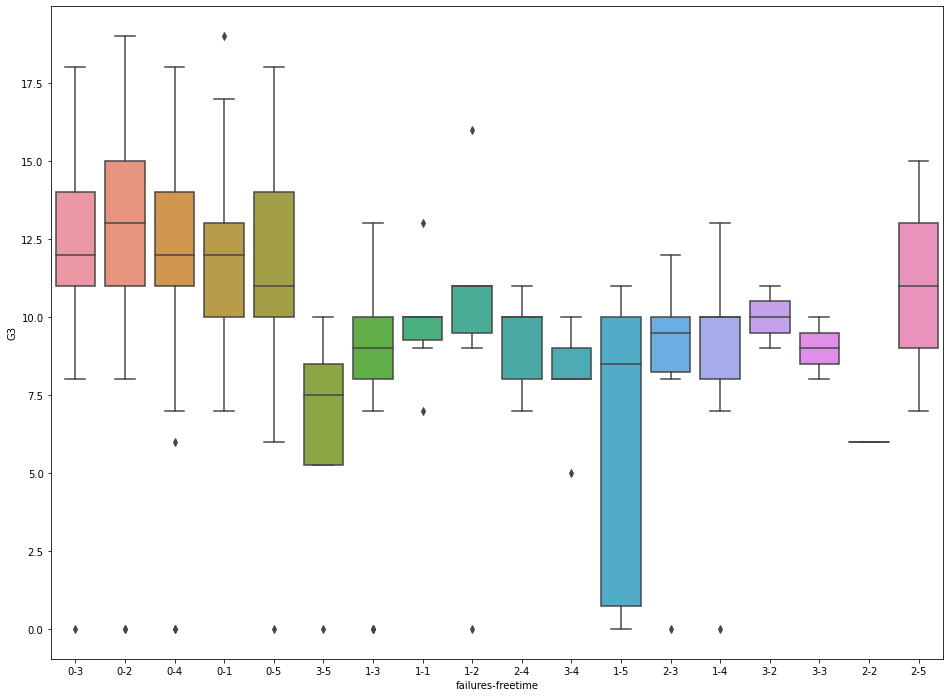

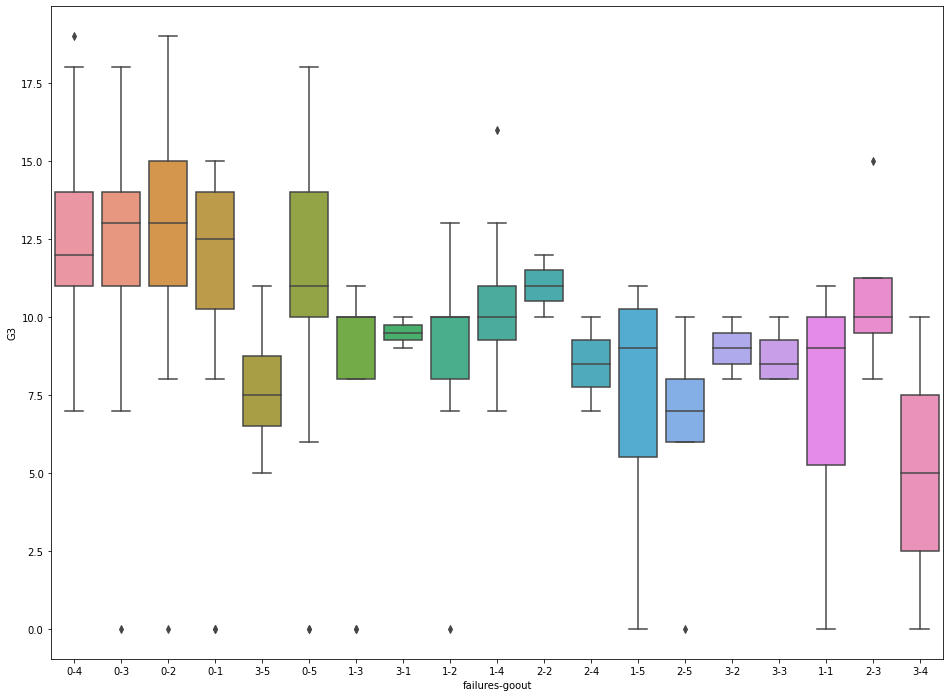

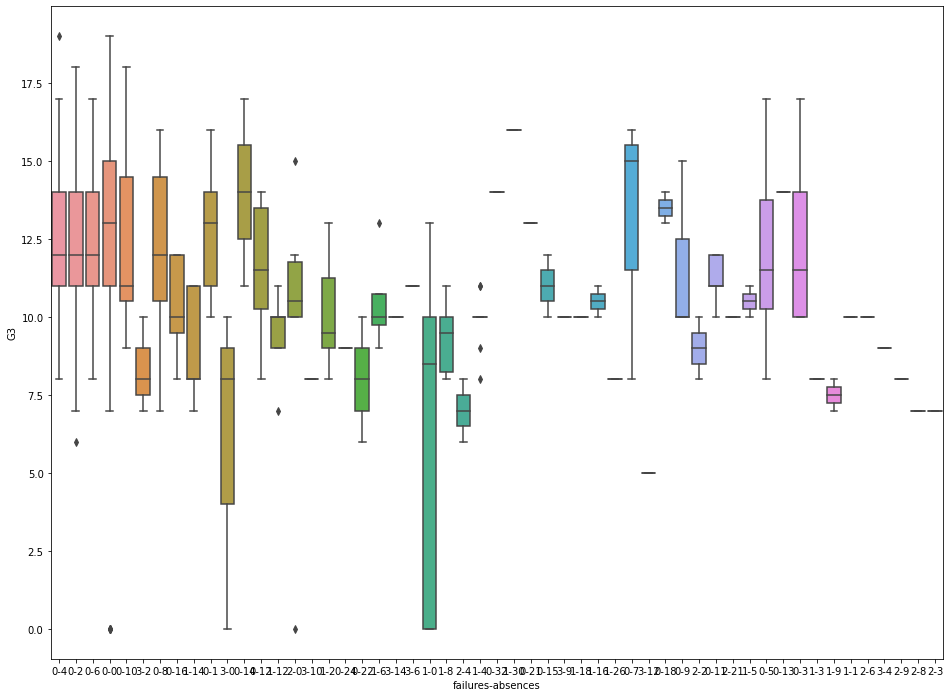

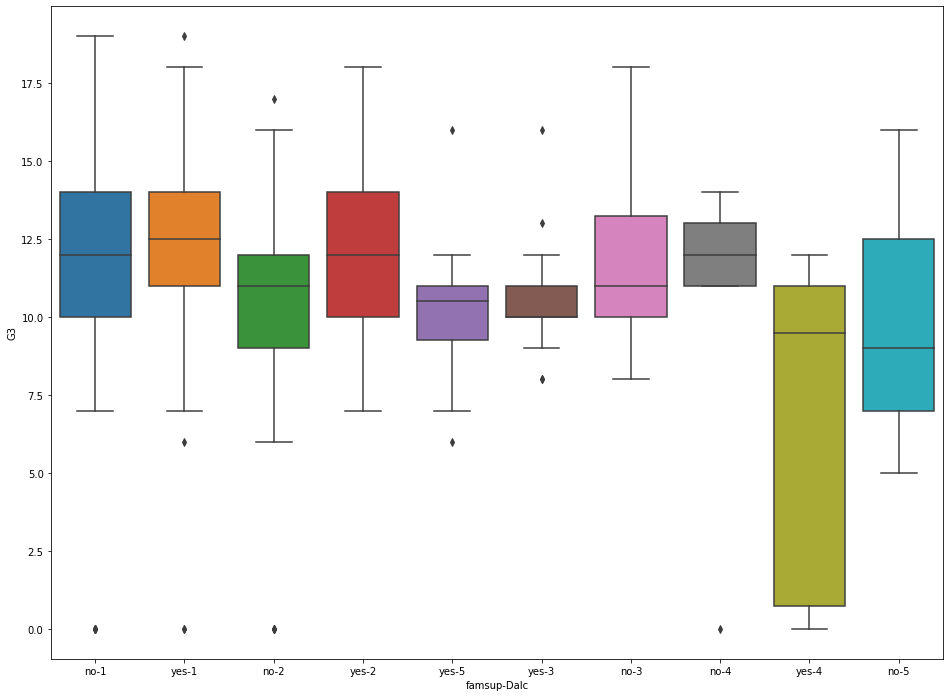

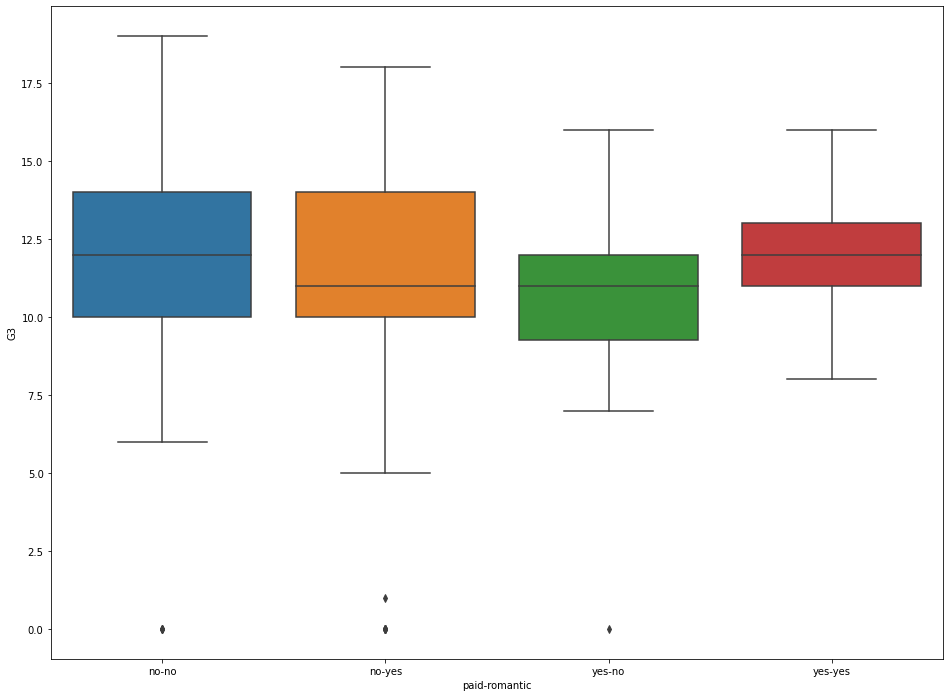

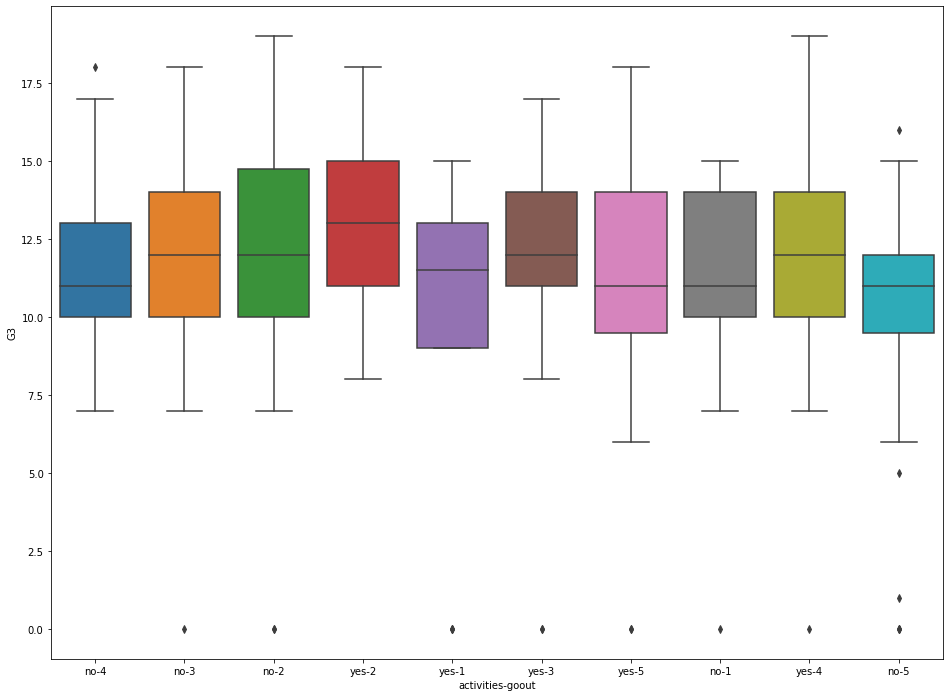

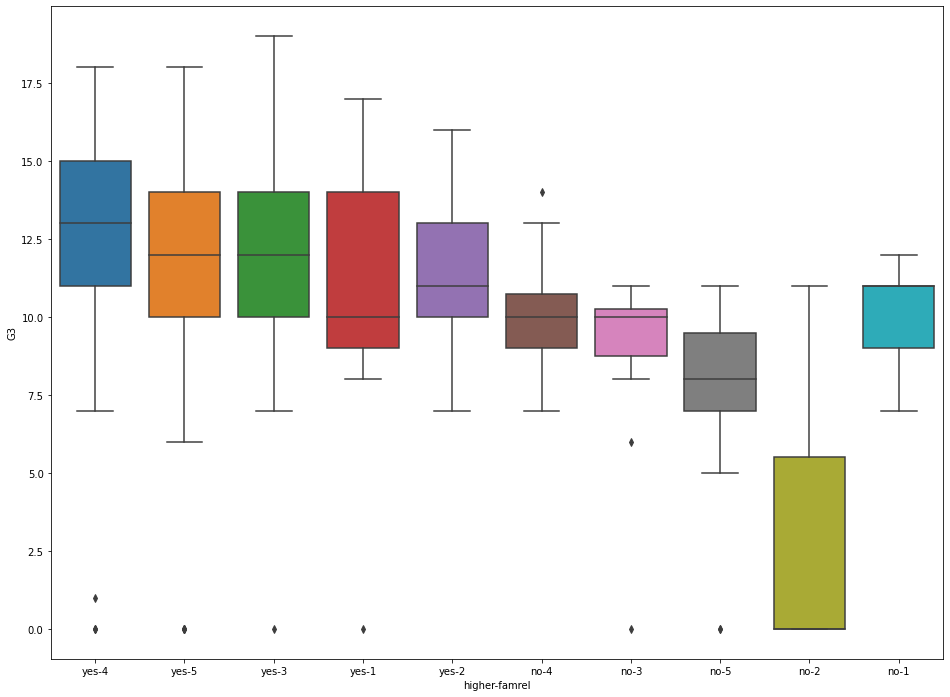

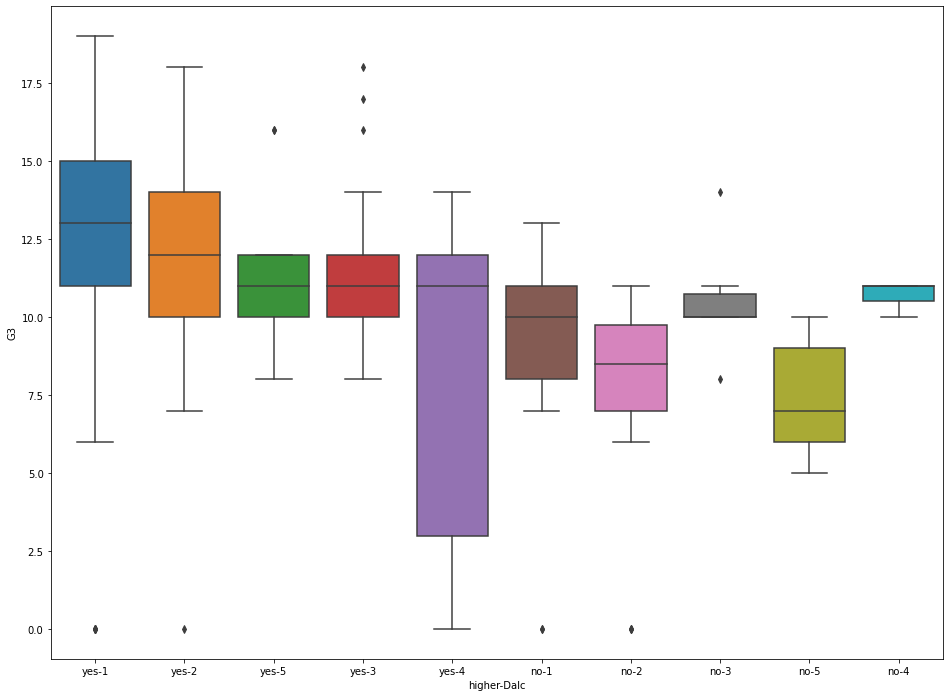

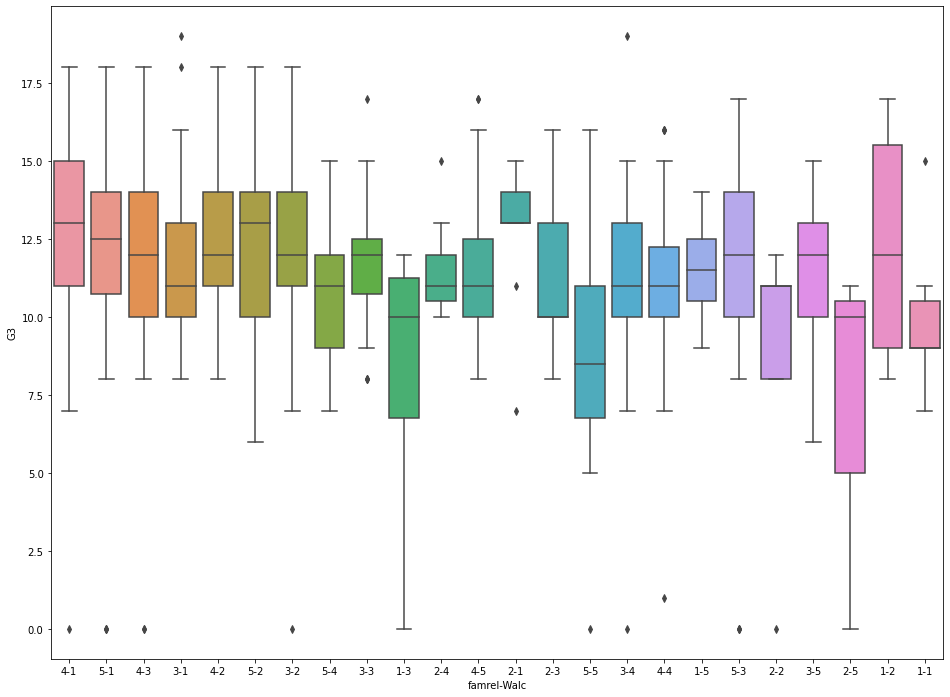

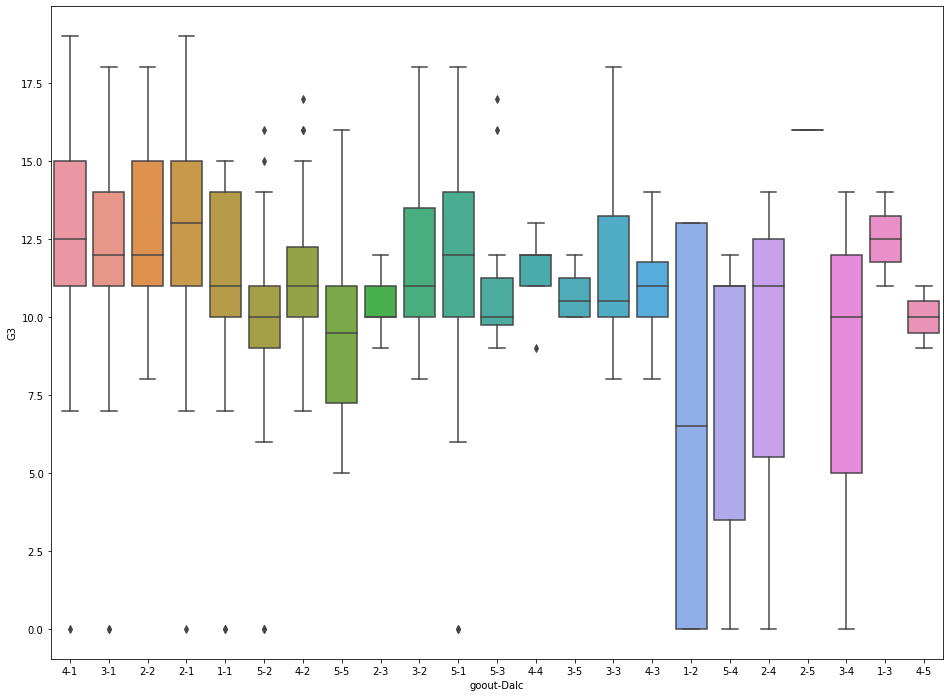

In [21]:
for tmp_df, pair_attr in zip(tmp_dfs, pair_attrs):
    plt.figure(figsize=(16, 12))
    sns.boxplot(data=tmp_df, x=f"{pair_attr['attribute_1']}-{pair_attr['attribute_2']}", y="G3")